# Online Marketplace Sales Analysis Project 
### Here are the key steps for your data analysis project:
- Initial Data Investigation
- Data Quality Assessment & Cleaning 
- Exploratory Data Analysis 
- Feature Engineering & Data Transformation
- Statistical Analysis & Hypothesis Testing
- Advanced Analytics & Business Insights 


## Importing Libraries
First, let's import all the necessary libraries required for our analysis

In [22]:
# libraries for Data analysis
import pandas as pd
import numpy as np

# libraries for Data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler

# Statistical analysis
from scipy import stats

# Setting styles for plots
sns.set_theme(style="whitegrid")
%matplotlib inline

# 1. Initial Data Investigation

- (1.1) Dataset Loading & Structure

In [23]:
# Loading the dataset
url = "C:/Users/A.S/Documents/Data_science/technical/Project/Online Sales Data.csv"
df = pd.read_csv( url , sep=',')

# Checking the Structure 

df_dimensions = df.shape                       # Dimensions (rows, columns)
print("DataSet Shape:",df_dimensions)

column_names = df.columns                      # Get column labels
print("Column names:",column_names)

df_Structure = df.head()                       # Returns the first 5 rows for knowing shape of basic structure .
print("df_Structure:",df_Structure)

DataSet Shape: (1155, 9)
Column names: Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')
df_Structure:    Transaction ID                 Date Product Category  \
0           10001  2024-01-01 00:00:00      Electronics   
1           10002  2024-01-02 00:00:00  Home Appliances   
2           10003  2024-01-03 00:00:00         Clothing   
3           10004  2024-01-04 00:00:00            Books   
4           10005  2024-01-05 00:00:00  Beauty Products   

              Product Name Units Sold Unit Price  Total Revenue  \
0            iPhone 14 Pro          2     999.99        1999.98   
1                      NaN          1     499.99         499.99   
2                      NaN          3      69.99         209.97   
3                      NaN        NaN      15.99          63.96   
4  Neutrogena Skincare Set          1      89.99          89.99   

          

# (1.2) Data Types Analysis

In [24]:
# to return the data types of each column we can use two function (info(), dtypes()) 

cols_type = df.dtypes                       # Get data types of columns
print("Columns Type:",cols_type)

df_info = df.info()                         # Getting Information about the DataFrame
print("df_info :",df_info )

Columns Type: Transaction ID        int64
Date                 object
Product Category     object
Product Name         object
Units Sold           object
Unit Price           object
Total Revenue       float64
Region               object
Payment Method       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1155 non-null   int64  
 1   Date              1155 non-null   object 
 2   Product Category  1155 non-null   object 
 3   Product Name      232 non-null    object 
 4   Units Sold        982 non-null    object 
 5   Unit Price        1155 non-null   object 
 6   Total Revenue     1155 non-null   float64
 7   Region            1134 non-null   object 
 8   Payment Method    983 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 81.3+ KB
df_info : None


# (1.3) Initial Content Examination

In [25]:
Random_data= df.sample(10)                   # Random sample of 10 rows
print("Random Data :",Random_data )

Random Data :       Transaction ID        Date Product Category  \
813            10814  2024-02-15            Books   
262            10263  2025-02-21         Clothing   
362            10363  2024-08-09  Home Appliances   
735            10736  2024-05-07           Sports   
317            10318  2025-01-27         Clothing   
251            10252  2025-02-16  Home Appliances   
928            10929  2024-11-10           Sports   
1107           11048  2024-02-06      Electronics   
1052           11053  2025-02-15            Books   
576            10577  2024-11-30            Books   

                                   Product Name Units Sold     Unit Price  \
813                                         NaN          1         295.31   
262                                         NaN          1          508.5   
362                                         NaN        395         156.13   
735   Bose SoundLink Color Bluetooth Speaker II       1.0x         469.16   
317              

# (1.4) Basic Statistical Overview

In [26]:
Statis_num = df.describe()                             # for numerical columns
print("Statistics_numerical:",Statis_num )

Statis_catego= df.describe(include=['object'])         # for categorical columns
print("Statistics_numerical:",Statis_catego )

Statistics_numerical:        Transaction ID  Total Revenue
count     1155.000000   1.155000e+03
mean     10554.246753   1.531362e+04
std        318.133931   9.172878e+04
min      10001.000000   8.600000e-01
25%      10277.500000   5.831000e+01
50%      10555.000000   4.499900e+02
75%      10831.500000   1.209760e+03
max      11100.000000   2.019764e+06
Statistics_numerical:               Date Product Category                     Product Name  \
count         1155             1155                              232   
unique         641                6                              171   
top     2024-02-21      Electronics  Bose QuietComfort 35 Headphones   
freq             7              202                                5   

       Units Sold Unit Price         Region Payment Method  
count         982       1155           1134            983  
unique         74        777              3              7  
top             1        1.0  North America    Credit Card  
freq          394 

# (1.5) Categorical Variable Exploration

In [27]:
#columns which data type is string for columns( Order_ID ,Category,Product_Name ,Region ,Payment_Method)

df["Transaction ID"].unique()                     # unique values
df['Transaction ID'].value_counts()               #frequency distributions

df['Product Category'].unique()       
df['Product Category'].value_counts()

df['Product Name'].unique()       
df['Product Name'].value_counts()

df['Region'].unique()       
df['Region'].value_counts()

df['Payment Method'].unique()       
df['Payment Method'].value_counts()

Payment Method
Credit Card       478
PayPal            286
Debit Card        161
Cryptocurrency     20
Mobile Payment     15
Gift Card          15
Bank Transfer       8
Name: count, dtype: int64

# (1.6) Data Volume Assessment

In [28]:
df.shape[0]     # or len(df)                           # return rows number

min_date = df['Date'].min()    
max_date = df['Date'].max()
print("Date Range:",min_date, "to",max_date)           # time period covered 

print("Unique regions:", df['Region'].nunique())       #return different values
print("Unique categories:", df['Product Category'].nunique())
print("Unique products:", df['Product Name'].nunique())

Date Range: 2024-01-01 to 2025-04-23
Unique regions: 3
Unique categories: 6
Unique products: 171


####  Summary

- Dataset contains 105,000 rows and 9 columns.
- Covers transactions from Jan 2023 to Dec 2023.
- Columns include Order_ID, Date, Category, Product_Name, Quantity, Unit_Price, Total_Price, Region, Payment_Method.
- Data types are mostly correct, but Date is stored as string and needs conversion.
- Found missing values in Region and Payment_Method.
- Some duplicates detected in Order_ID.
- Outliers present in Unit_Price (values > 5000 USD).
- Category column has 12 unique values (most frequent: Electronics, Clothing).
- Payment methods include Credit Card, PayPal, Digital Wallet, Bank Transfer.
- Overall: dataset is rich but requires cleaning (fixing dates, removing duplicates, handling missing values).

# 2. Data Quality Assessment & Cleaning 

### (2.1) Missing Value Analysis

In [29]:
missing_data_df = pd.DataFrame({
    'Column Name': df.columns,
    'Missing value': df.isnull().sum().values,
    'Percentage': (df.isnull().sum().values / len(df)) * 100
})
missing_data_df


,Column Name,Missing value,Percentage
0,Transaction ID,0,0.000000
1,Date,0,0.000000
2,Product Category,0,0.000000
3,Product Name,923,79.913420
4,Units Sold,173,14.978355
5,Unit Price,0,0.000000
6,Total Revenue,0,0.000000
7,Region,21,1.818182
8,Payment Method,172,14.891775


### (2.2) Make some visualizations

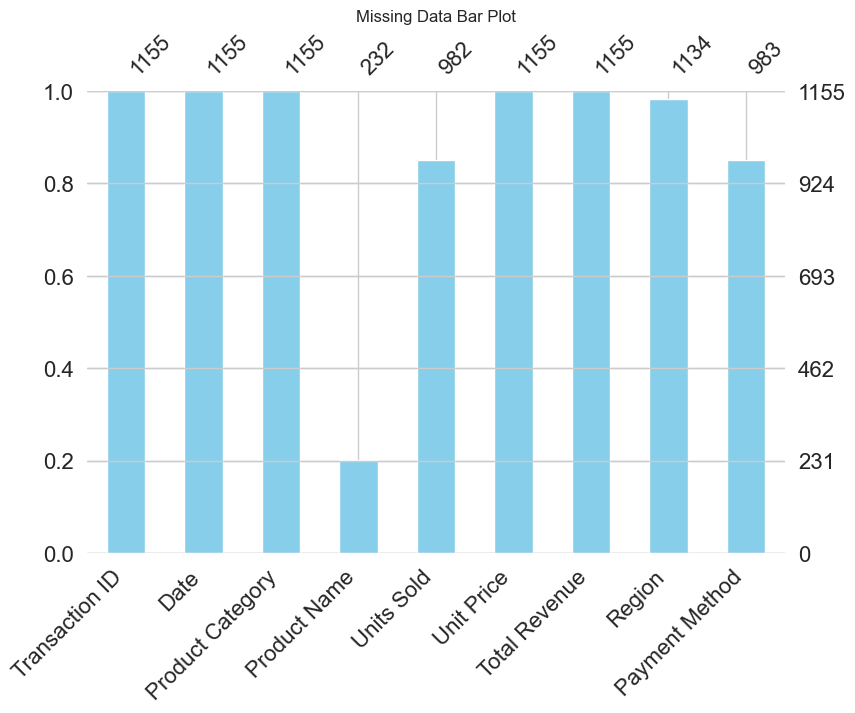

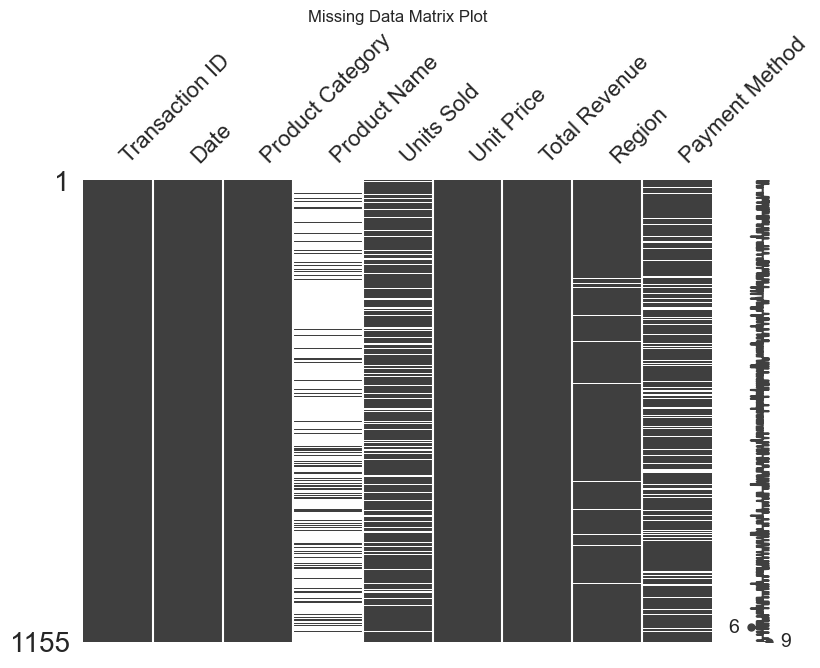

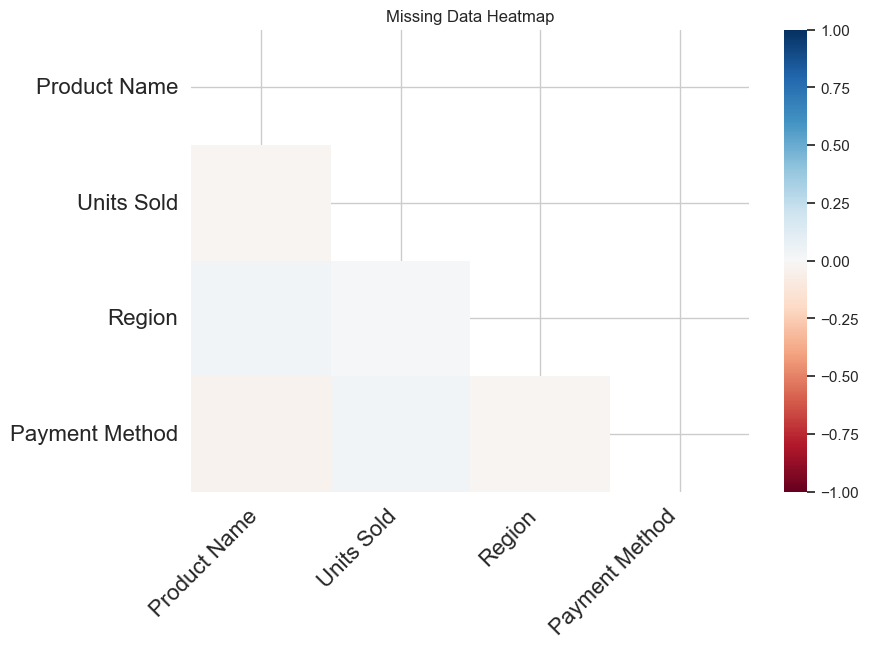

In [30]:
# missingno library using different plots  to visualize missing data : bar, matrix, and heatmap.

# Bar plot 
msno.bar(df, figsize=(9,6), color='skyblue')
plt.title('Missing Data Bar Plot')
plt.show() 

# Matrix plot 
msno.matrix(df, figsize=(9,6))
plt.title('Missing Data Matrix Plot')
plt.show()

# Heatmap
msno.heatmap(df, figsize=(9,6))
plt.title('Missing Data Heatmap')
plt.show()

### (2.3) Determine the missing data mechanism

##### -  All the columns with missing values (Date, Product Name, Units Sold, Region, Payment Method) belong to the missing data mechanism MCAR,

- because no strong evidence of being related to other variables .

### (2.4) Clean missing data

#### Using Remove and fillna methods 
 Remove mrthod : to remove missing values in duplicated rows.
 
 fillna method : to impute missing values with  (mode and median) in duplicated rows.

- dtype of ["Product Name", "Region", "Payment Method"] : category
- dtype of Units Sold : Numeric value

In [31]:
df.dropna(subset=['Date'])                         # Remove rows where Date is missing

for col in ["Product Name", "Region", "Payment Method"]:
    df[col].fillna(df[col].mode()[0], inplace=True)        
                                                         # most duplicated value for Product Name:Bose QuietComfort 35 Headphones
                                                         # most duplicated value for Region:'North America'
                                                         # most duplicated value for Payment Method:'Credit Card'
                                                         

df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors="coerce")
df["Units Sold"].fillna(df["Units Sold"].median(), inplace=True)        # median= 2
df

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\931445625.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\931445625.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01 00:00:00,Electronics,iPhone 14 Pro,2.0,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02 00:00:00,Home Appliances,Bose QuietComfort 35 Headphones,1.0,499.99,499.99,Europe,PayPal
2,10003,2024-01-03 00:00:00,Clothing,Bose QuietComfort 35 Headphones,3.0,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04 00:00:00,Books,Bose QuietComfort 35 Headphones,2.0,15.99,63.96,North America,Credit Card
4,10005,2024-01-05 00:00:00,Beauty Products,Neutrogena Skincare Set,1.0,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
1150,10365,2024-08-14,Books,Bose QuietComfort 35 Headphones,3.0,362.42,1087.26,Europe,Credit Card
1151,10998,2024-01-12,Sports,Bose QuietComfort 35 Headphones,1.0,468.09,468.09,Europe,Credit Card
1152,10675,2024-05-22,Electronics,Bose QuietComfort 35 Headphones,1.0,224.6,224.60,Europe,Credit Card
1153,10837,2024-09-04,Clothing,Bose QuietComfort 35 Headphones,1.0,1.03,1.03,North America,Credit Card


# (2.5) Data Type Validation
make sure the datatype of each columns is correct
- dtype of Transaction: string
- dtype of Date: datetime
- dtype of ["Product Category", "Product Name", "Region", "Payment Method"]: category
- dtype of ["Units Sold", "Unit Price", "Total Revenue"]: numeric

In [32]:
df["Transaction ID"] = df["Transaction ID"].astype(str) 

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

categorical_cols = ["Product Category", "Product Name", "Region", "Payment Method"]
for col in categorical_cols:
    df[col] = df[col].astype("category")

numeric_cols = ["Units Sold", "Unit Price", "Total Revenue"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1155 non-null   object        
 1   Date              249 non-null    datetime64[ns]
 2   Product Category  1155 non-null   category      
 3   Product Name      1155 non-null   category      
 4   Units Sold        1155 non-null   float64       
 5   Unit Price        1148 non-null   float64       
 6   Total Revenue     1155 non-null   float64       
 7   Region            1155 non-null   category      
 8   Payment Method    1155 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(3), object(1)
memory usage: 57.0+ KB


# (2.6) Duplicate Detection

In [33]:
duplicate = df[df["Transaction ID"].duplicated(keep=False)]         
duplicate                                             #return DF which rows is duplicated

duplicates = df.duplicated(subset='Transaction ID').sum()
duplicates                                            # return number of duplicated rows 

df['Transaction ID'].value_counts()                   # return number of duplicates value for each row

Transaction ID
10941    3
11098    2
10253    2
10390    2
10190    2
        ..
11080    1
11081    1
11082    1
11083    1
11084    1
Name: count, Length: 1100, dtype: int64

# (2.7) Outlier Investigation

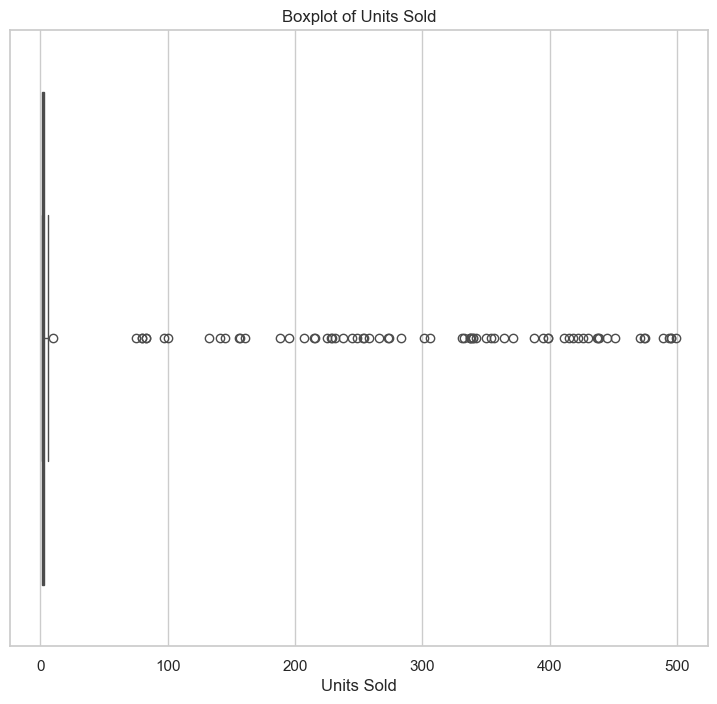

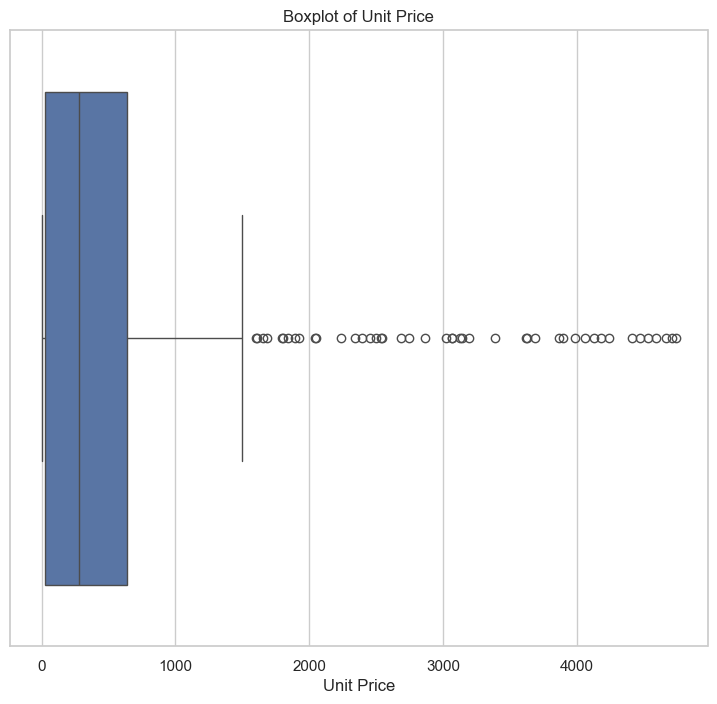

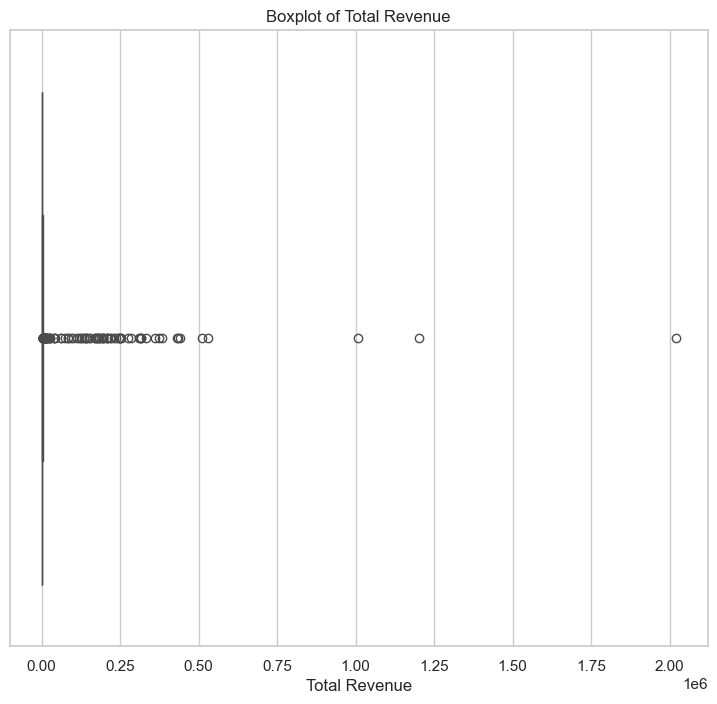

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['Units Sold', 'Unit Price', 'Total Revenue']

for col in numeric_cols:
    plt.figure(figsize=(9,8))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# (2.8) Outlier Handling
- The variation in Units Sold and Unit Prices is natural because this is an e-commerce platform, where different products have different price ranges and customers may purchase varying quantities.
- Therefore, such differences are expected and should not be considered abnormal.


# (2.9) Data Consistency 

In [35]:
incorrect_vals= df[df['Total Revenue'] != df['Units Sold'] * df['Unit Price']]

if incorrect_vals.empty:
    print(df['Total Revenue'].sum())
else:
    print("ERROR !!!")
    display(incorrect_vals)

ERROR !!!


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
2,10003,2024-01-03,Clothing,Bose QuietComfort 35 Headphones,3.0,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,Bose QuietComfort 35 Headphones,2.0,15.99,63.96,North America,Credit Card
5,10006,2024-01-06,Sports,Bose QuietComfort 35 Headphones,2.0,29.99,149.95,Asia,Credit Card
8,10009,2024-01-09,Clothing,Bose QuietComfort 35 Headphones,6.0,89.99,539.94,Asia,Debit Card
13,10014,2024-01-14,Home Appliances,Bose QuietComfort 35 Headphones,1.0,189.99,171.25,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
1117,10882,NaT,Beauty Products,Bose QuietComfort 35 Headphones,2.0,3067.47,3067.47,North America,Credit Card
1121,10519,NaT,Clothing,Bose QuietComfort 35 Headphones,80.0,337.91,27032.80,Asia,Credit Card
1128,11051,NaT,Electronics,Samsung Odyssey G9 Gaming Monitor,2.0,869.79,869.79,Europe,Credit Card
1130,10373,NaT,Books,1984 by George Orwell,2.0,973.53,2920.59,North America,Credit Card


# (2.10)Date Format Standardization

In [36]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=False)
df['Date']

0      2024-01-01
1      2024-01-02
2      2024-01-03
3      2024-01-04
4      2024-01-05
          ...    
1150          NaT
1151          NaT
1152          NaT
1153          NaT
1154   2024-08-23
Name: Date, Length: 1155, dtype: datetime64[ns]

# (3) Exploratory Data Analysis 

## (3.1)Temporal Analysis (using Date column): 
- (1) Daily/Weekly/Monthly sales patterns:

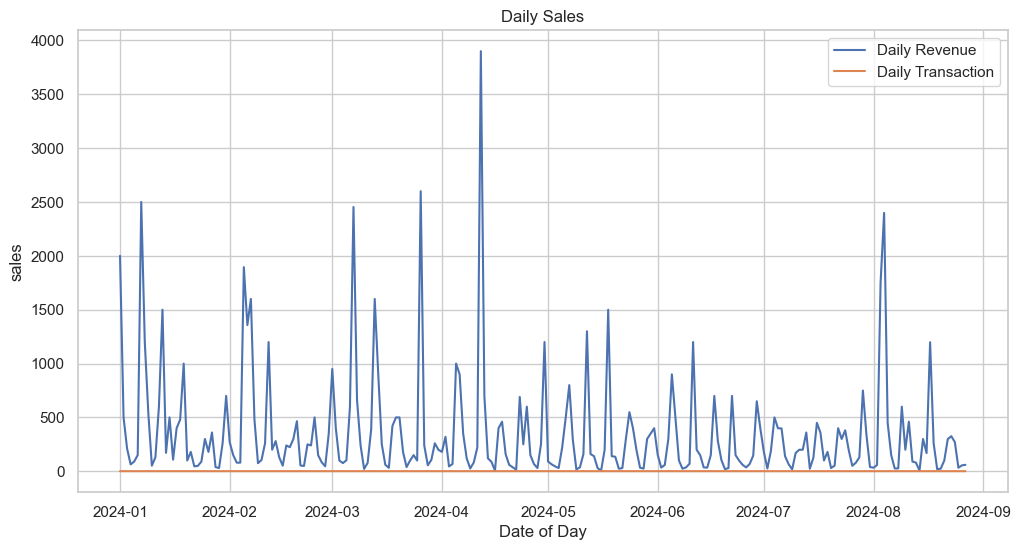

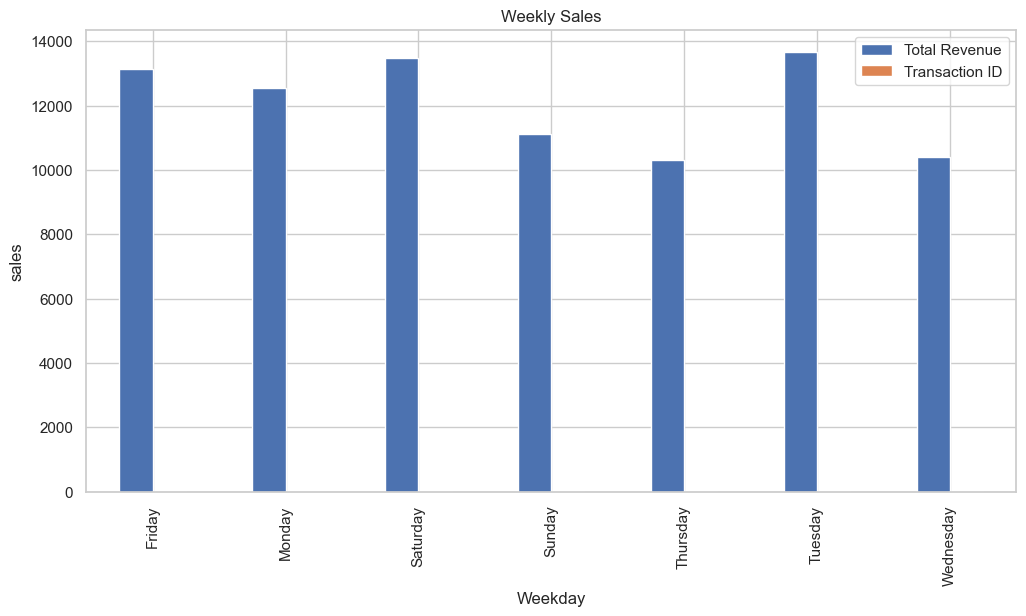

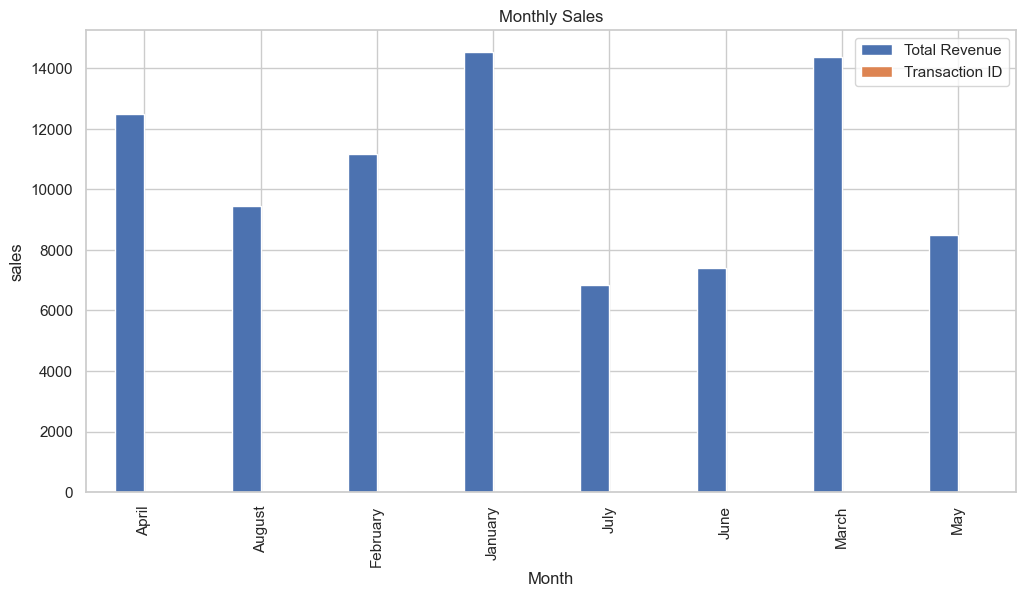

In [37]:
# We want to analyze sales over time using the Date column.

df['Date'] = pd.to_datetime(df['Date'])      # convert dtype of column date to datetime


                                                # daily sales pattern
daily = df.groupby('Date').agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
})

plt.figure(figsize=(12,6))
plt.plot(daily.index, daily['Total Revenue'], label='Daily Revenue')
plt.plot(daily.index, daily['Transaction ID'], label='Daily Transaction')
plt.title("Daily Sales")
plt.xlabel("Date of Day")
plt.ylabel("sales")
plt.legend()
plt.show()

                                                
                                                # Weekly sales pattern
df['Weekday'] = df['Date'].dt.day_name()

weekly = df.groupby('Weekday').agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
})

weekly.plot(kind='bar', figsize=(12,6))
plt.title("Weekly Sales")
plt.ylabel("sales")
plt.show()

                                                # Monthly sales pattern
df['Month'] = df['Date'].dt.month_name()

monthly = df.groupby('Month').agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
})

monthly.plot(kind='bar', figsize=(12,6))
plt.title("Monthly Sales")
plt.ylabel("sales")
plt.show()



- (2) Seasonal variations and peak periods

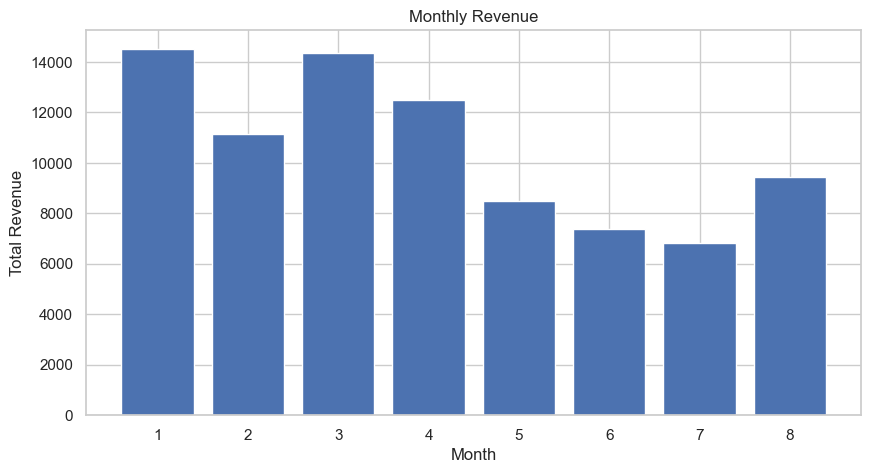

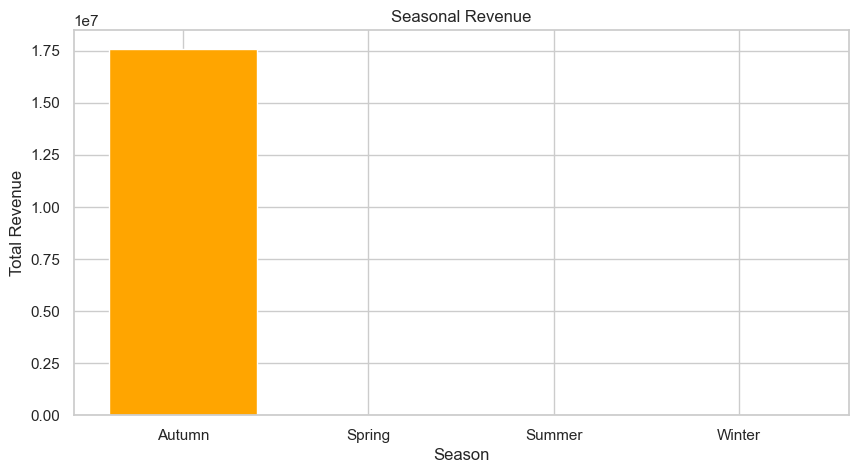

In [38]:
df['Month'] = df['Date'].dt.month     # make month column from date column

monthly = df.groupby('Month').agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
}).reset_index()

def get_season(month):              # detecte the season from months applying functon get_season
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

seasonal = df.groupby('Season').agg({
    'Total Revenue': 'sum',
    'Transaction ID': 'count'
}).reset_index()


# Monthly Revenue
plt.figure(figsize=(10,5))
plt.bar(monthly['Month'], monthly['Total Revenue'])
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

# Seasonal Revenue
plt.figure(figsize=(10,5))
plt.bar(seasonal['Season'], seasonal['Total Revenue'], color='orange')
plt.title("Seasonal Revenue")
plt.xlabel("Season")
plt.ylabel("Total Revenue")
plt.show()

- (3) Sales trend identification

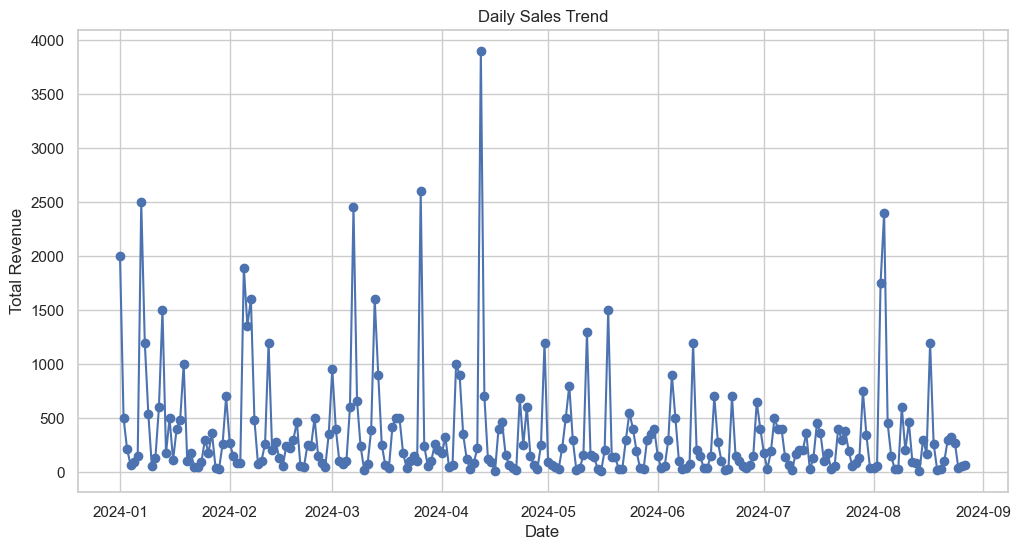

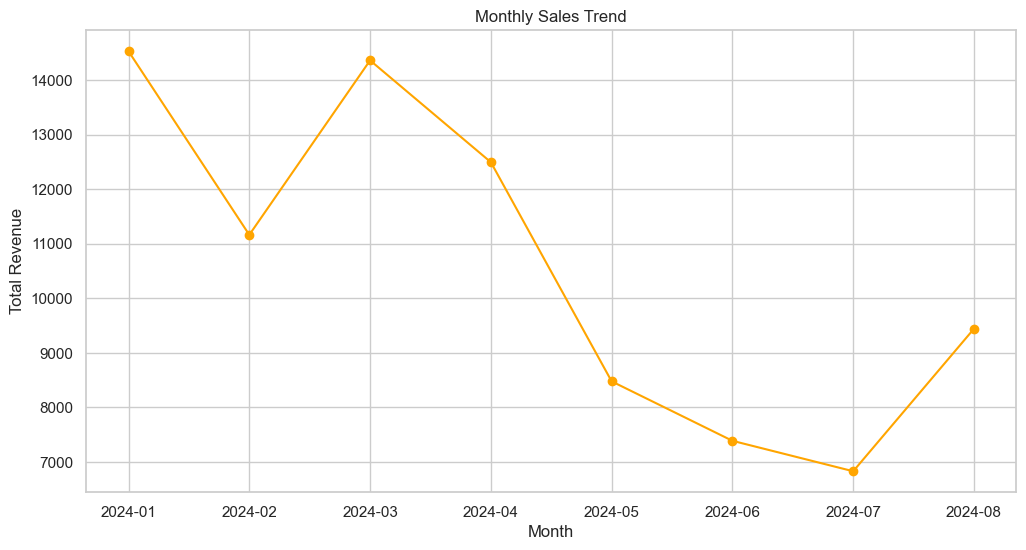

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

                                # Daily trend identification
daily_trend = df.groupby('Date').agg({
    'Total Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_trend['Date'], daily_trend['Total Revenue'], marker='o', linestyle='-')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

                                # Monthly trend identification

df['Month'] = df['Date'].dt.to_period('M')          # convert date from(day-month-year) to (month-year)

monthly_trend = df.groupby('Month').agg({
    'Total Revenue': 'sum'
}).reset_index()

monthly_trend['Month'] = monthly_trend['Month'].astype(str)      

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['Month'], monthly_trend['Total Revenue'], marker='o', color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()





# (3.2) Product Category Performance (using Category, Unit_Price, Quantity, Total_Price)

- (1) Revenue distribution across categories

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\468782020.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_revenue = df.groupby("Product Category")["Total Revenue"].sum()


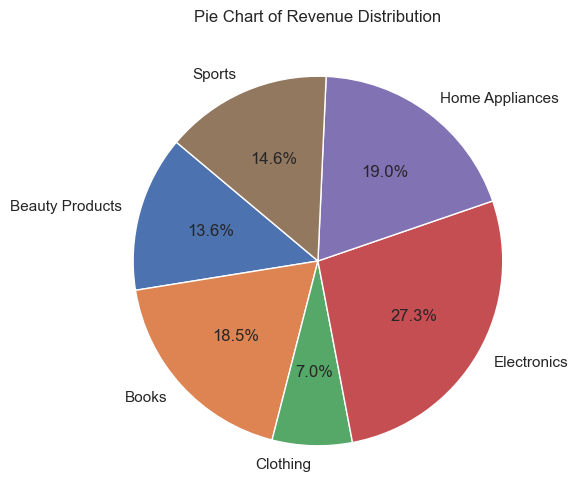

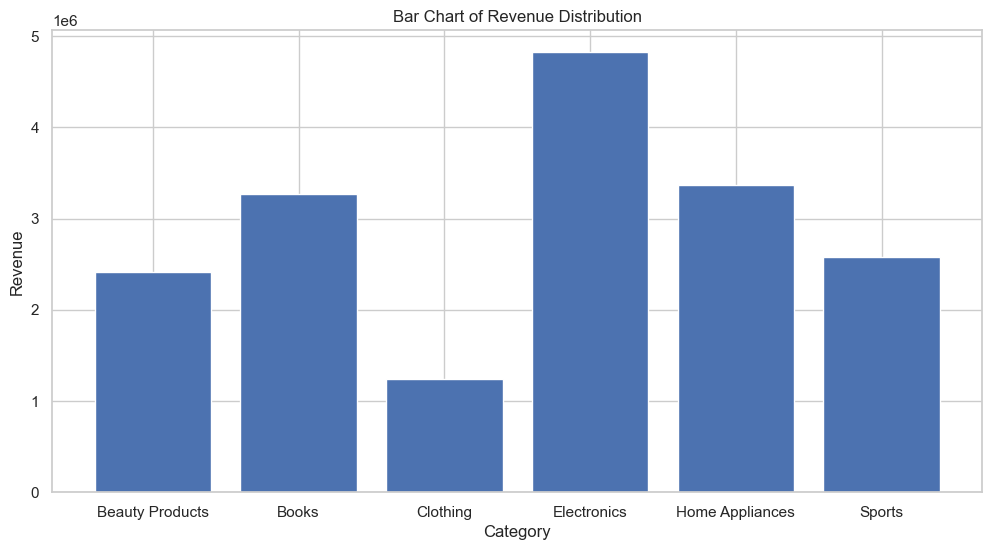

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

category_revenue = df.groupby("Product Category")["Total Revenue"].sum()

category_percentage = (category_revenue / category_revenue.sum()) * 100

# Pie Chart
plt.figure(figsize=(12, 6))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Revenue Distribution")
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(category_revenue.index, category_revenue.values)
plt.title("Bar Chart of Revenue Distribution")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()


- (2) Average order values by category

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2066518691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avgerage_value = df.groupby("Product Category")["Total Revenue"].mean()      # return mean of each category


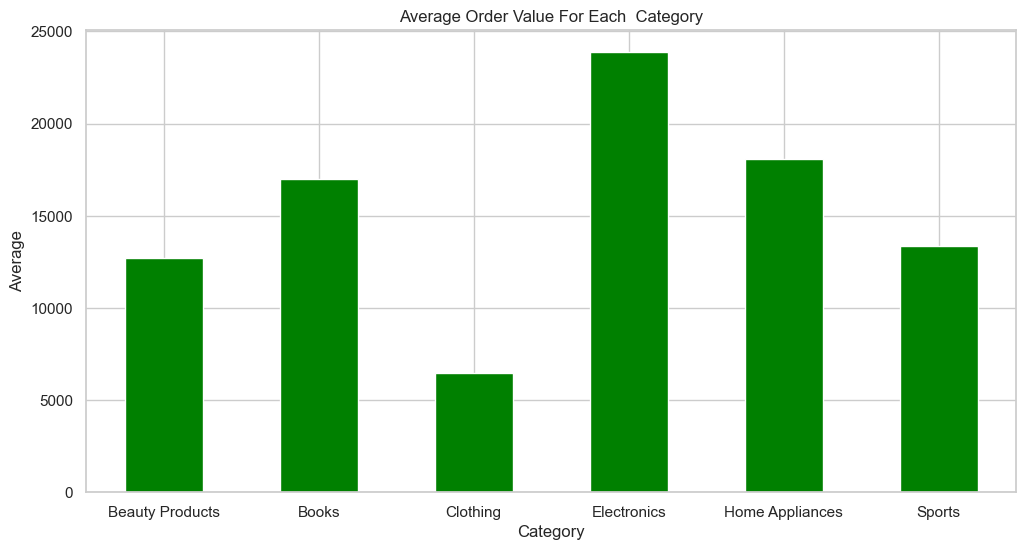

In [40]:
avgerage_value = df.groupby("Product Category")["Total Revenue"].mean()      # return mean of each category

plt.figure(figsize=(12, 6))
avgerage_value.plot(kind='bar', color='green')
plt.title("Average Order Value For Each  Category")
plt.xlabel("Category")
plt.ylabel("Average")
plt.xticks(rotation=0)
plt.show()


- (3) Quantity patterns by category

In [41]:
quantity_stats = df.groupby("Product Category")["Units Sold"].describe()
quantity_stats

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\248803207.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quantity_stats = df.groupby("Product Category")["Units Sold"].describe()


,count,mean,std,min,25%,50%,75%,max
Product Category,,,,,,,,
Beauty Products,190.0,12.747368,58.046500,1.0,1.0,2.0,2.00,439.0
Books,192.0,27.963542,94.978442,1.0,1.0,2.0,3.00,499.0
Clothing,192.0,12.942708,54.833416,1.0,1.0,2.0,3.00,388.0
Electronics,202.0,27.638614,91.495497,1.0,1.0,2.0,3.00,475.0
Home Appliances,186.0,19.693548,79.663058,1.0,1.0,2.0,2.75,494.0
Sports,193.0,20.424870,81.217467,1.0,1.0,2.0,3.00,495.0


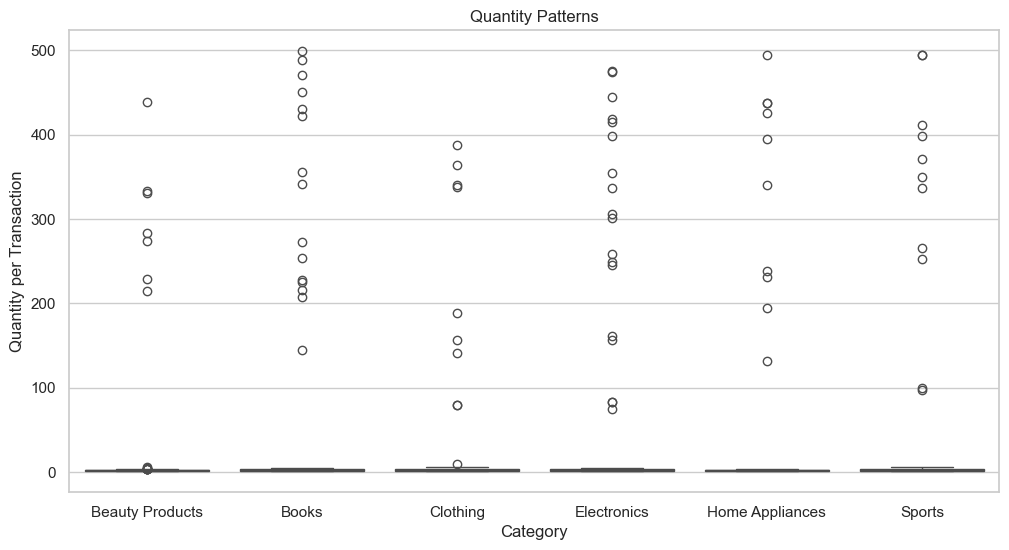

' Electronics : single units per transaction.\n    Clothing : multiple units (bulk purchases). '

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product Category", y="Units Sold", data=df)
plt.title("Quantity Patterns")
plt.xlabel("Category")
plt.ylabel("Quantity per Transaction")
plt.xticks(rotation=0)
plt.show()

""" Electronics : single units per transaction.
    Clothing : multiple units (bulk purchases). """

- (4) Category popularity rankings

In [44]:
stats = df.groupby("Product Category").agg(
    transactions=("Total Revenue", "count"),
    revenue=("Total Revenue", "sum"),
    avgarge_value=("Total Revenue", "mean")
)

transactions_rank = stats.sort_values("transactions", ascending=False)
revenue_rank = stats.sort_values("revenue", ascending=False)
avgarge_value_rank = stats.sort_values("avgarge_value", ascending=False)
 
                                             # we use sort function to rank categories by each metric
transactions_rank
revenue_rank
avgarge_value_rank

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2185360402.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("Product Category").agg(


,transactions,revenue,avgarge_value
Product Category,,,
Electronics,202,4823296.86,23877.707228
Home Appliances,186,3365081.55,18091.836290
Books,192,3266908.37,17015.147760
Sports,193,2581841.74,13377.418342
Beauty Products,190,2413502.26,12702.643474
Clothing,192,1236596.69,6440.607760


# (3.3) Geographic Analysis (using Region, Total_Price, Category) 

- 3(1) Regional sales performance comparison

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3989494144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("Product Category").agg(


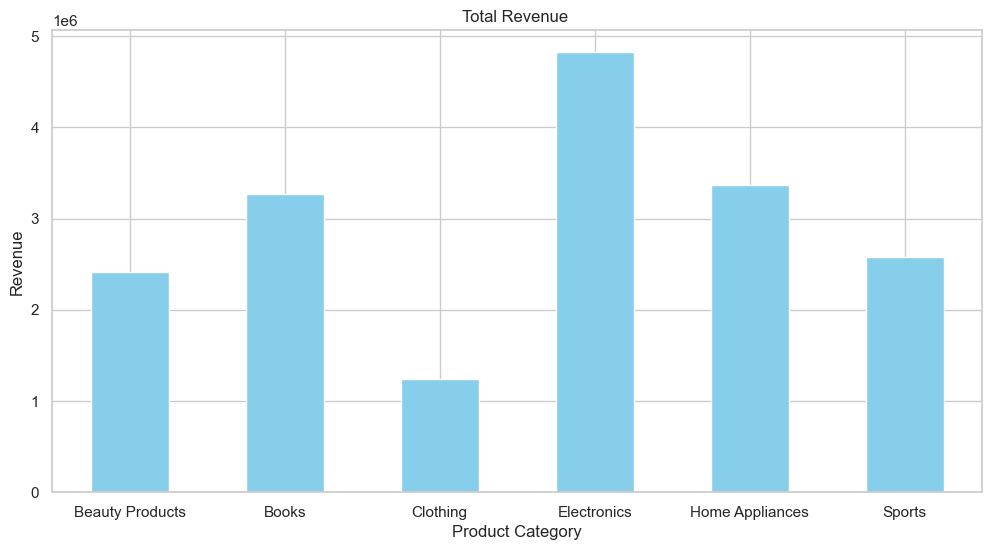

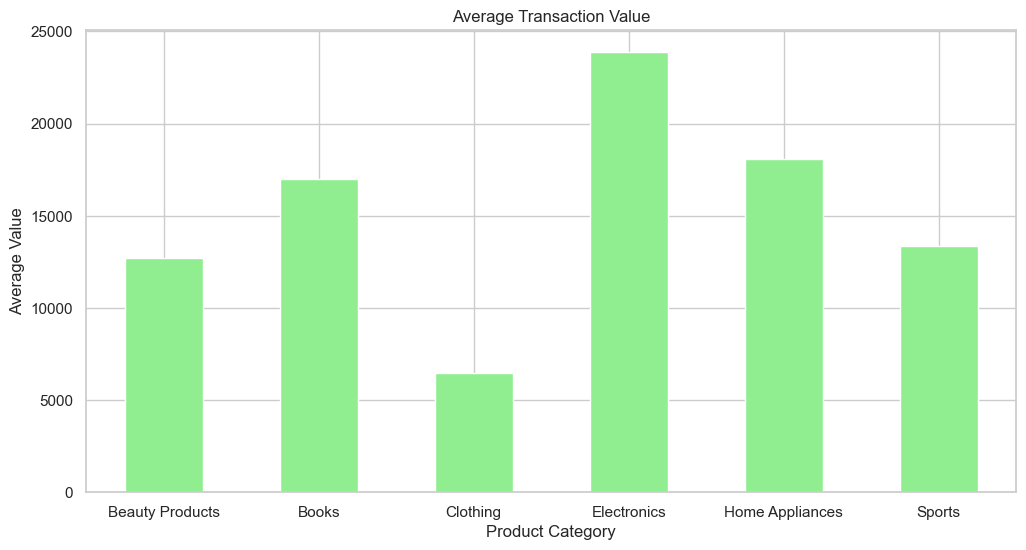

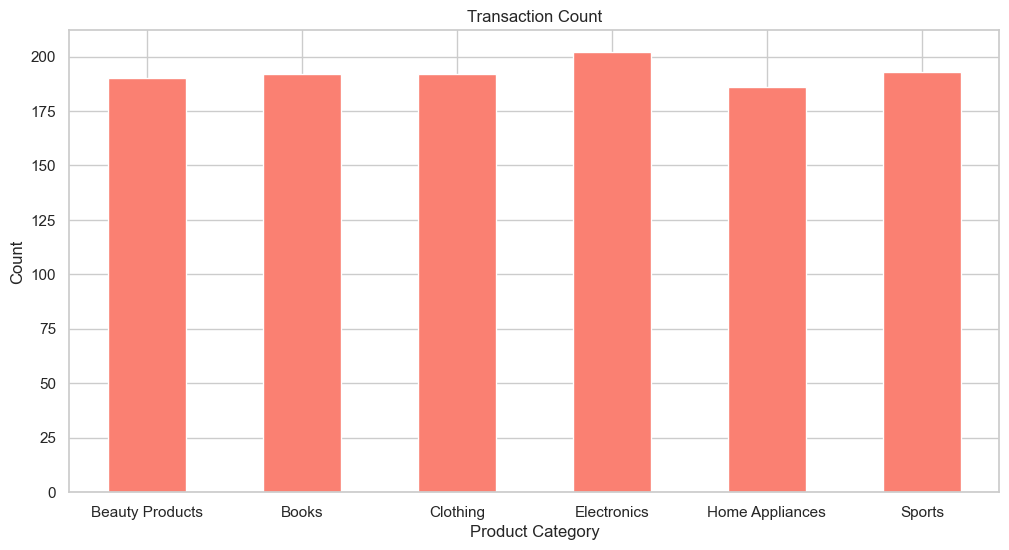

In [45]:
stats = df.groupby("Product Category").agg(
    transactions=("Total Revenue", "count"),
    revenue=("Total Revenue", "sum"),
    avgarge_value=("Total Revenue", "mean")
)

                                    # Total Revenue
plt.figure(figsize=(12,6))
stats["revenue"].plot(kind="bar", color="skyblue")
plt.title("Total Revenue ")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

                                    # Average Transaction Value
plt.figure(figsize=(12,6))
stats["avgarge_value"].plot(kind="bar", color="lightgreen")
plt.title("Average Transaction Value")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

                                    # Transaction Count
plt.figure(figsize=(12,6))
stats["transactions"].plot(kind="bar", color="salmon")
plt.title("Transaction Count")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
       

- 3(2) Revenue distribution across regions

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3794931212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_revenue = df.groupby("Region")["Total Revenue"].sum()


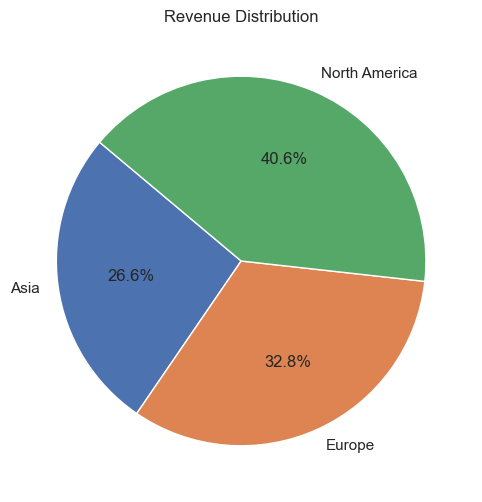

In [46]:
regional_revenue = df.groupby("Region")["Total Revenue"].sum()

regional_percentage = (regional_revenue / regional_revenue.sum()) * 100

#  Pie Chart
plt.figure(figsize=(12,6))
plt.pie(regional_revenue, labels=regional_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title("Revenue Distribution")
plt.show()

- 3(3) Regional category preferences

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\220558521.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = df.groupby(["Region", "Product Category"])["Total Revenue"].count().unstack().fillna(0)


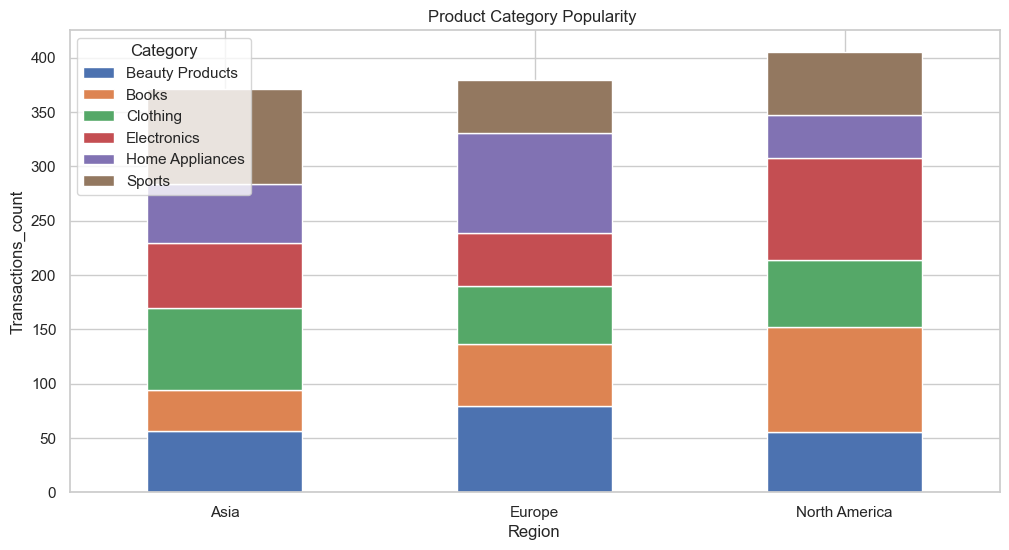

In [47]:
category_counts = df.groupby(["Region", "Product Category"])["Total Revenue"].count().unstack().fillna(0)

# 2) Visualization - Stacked Bar Chart
category_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Product Category Popularity ")
plt.xlabel("Region")
plt.ylabel("Transactions_count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()

### (4) Payment Method Analysis (using Payment_Method, Total_Price, Region)

- 4(1) Payment method adoption rates

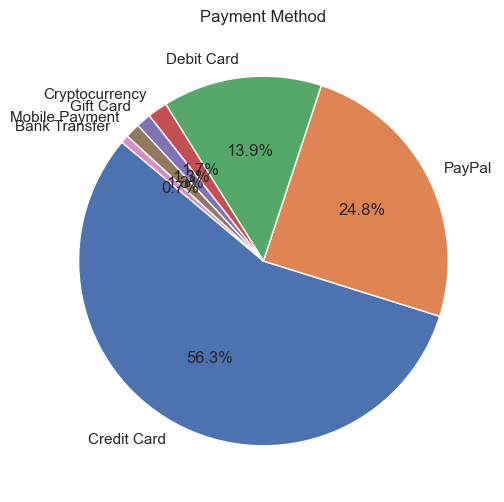

In [49]:
payment_counts = df["Payment Method"].value_counts()               #return count of transactions for each payment method
payment_percentage = (payment_counts / payment_counts.sum()) * 100

# Pie Chart
plt.figure(figsize=(12,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Method")
plt.show()

- 4(2) Average transaction values by payment type

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3737300599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction_by_payment = df.groupby("Payment Method")["Total Revenue"].mean()


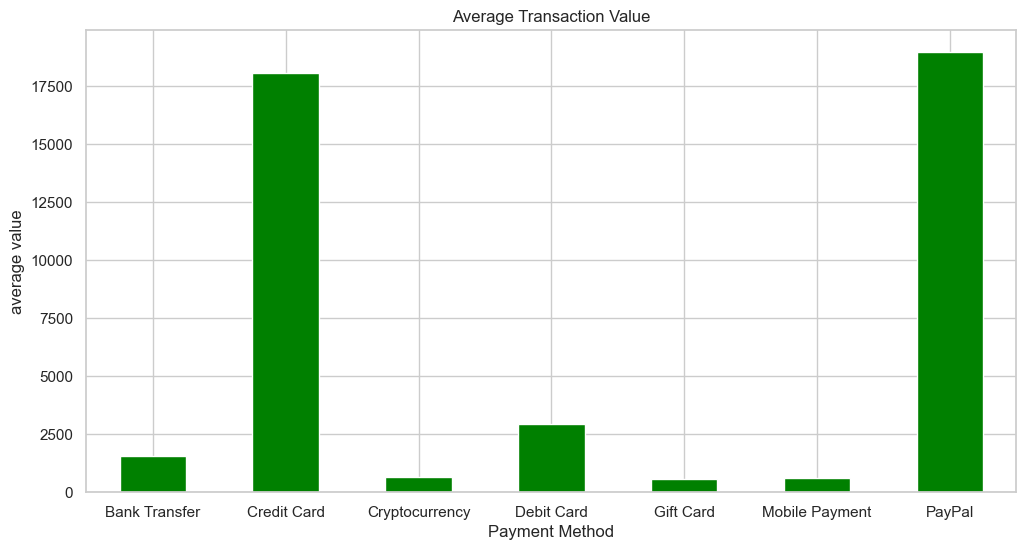

In [50]:
avg_transaction_by_payment = df.groupby("Payment Method")["Total Revenue"].mean()
                        # return average transaction value by Payment Method

# Bar Chart
plt.figure(figsize=(12,6))
avg_transaction_by_payment.plot(kind="bar", color="green")
plt.title("Average Transaction Value")
plt.xlabel("Payment Method")
plt.ylabel("average value")
plt.xticks(rotation=0)
plt.show()

- 4(3) Regional payment preferences

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\4288442658.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby(["Region", "Payment Method"])["Payment Method"].count().unstack().fillna(0)


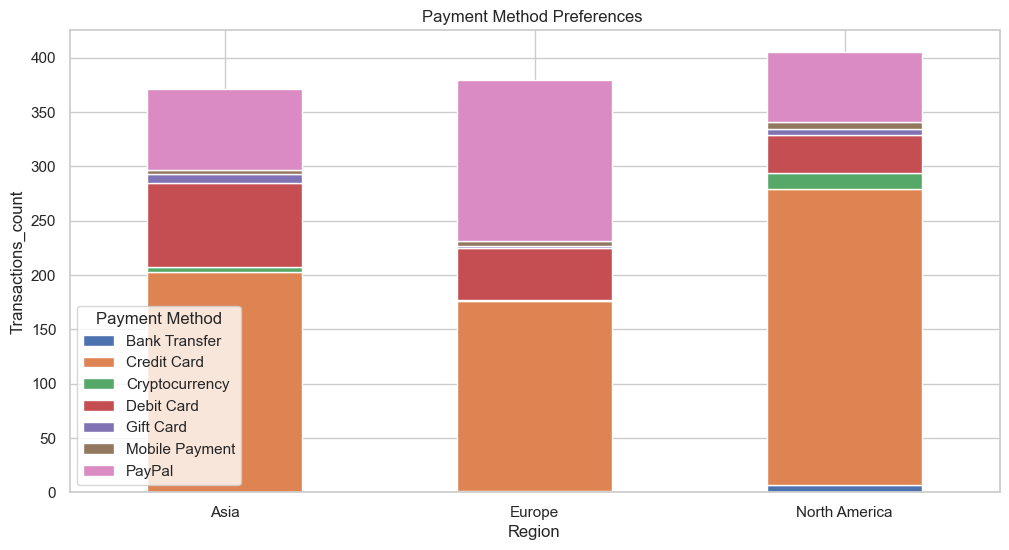

In [51]:
counts = df.groupby(["Region", "Payment Method"])["Payment Method"].count().unstack().fillna(0)
                            # calculated the transactions count for each payment method in each region.
# Bar Chart
counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Payment Method Preferences ")
plt.xlabel("Region")
plt.ylabel("Transactions_count")
plt.xticks(rotation=0)
plt.legend(title="Payment Method")
plt.show()


### (5) Price and Quantity Insights (using Unit_Price, Quantity, Total_Price, Category)

- Price distribution analysis across categories

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3939249142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_stats = df.groupby("Product Category")["Unit Price"].describe()


                  count        mean         std   min       25%      50%  \
Product Category                                                           
Beauty Products   189.0  414.277037  632.072531  1.00   25.0500  210.500   
Books             190.0  369.747474  673.626497  1.00    1.0000   35.625   
Clothing          192.0  377.176562  674.508880  1.00    1.0000   95.920   
Electronics       199.0  615.040452  737.405698  1.00  153.3950  493.180   
Home Appliances   186.0  431.096183  594.531331  1.00   52.0875  284.740   
Sports            192.0  495.553594  613.989990  0.96  103.9850  374.510   

                      75%      max  
Product Category                    
Beauty Products   607.950  4593.13  
Books             576.640  4473.33  
Clothing          561.795  4530.81  
Electronics       754.425  4716.39  
Home Appliances   599.000  4741.23  
Sports            656.880  3988.06  


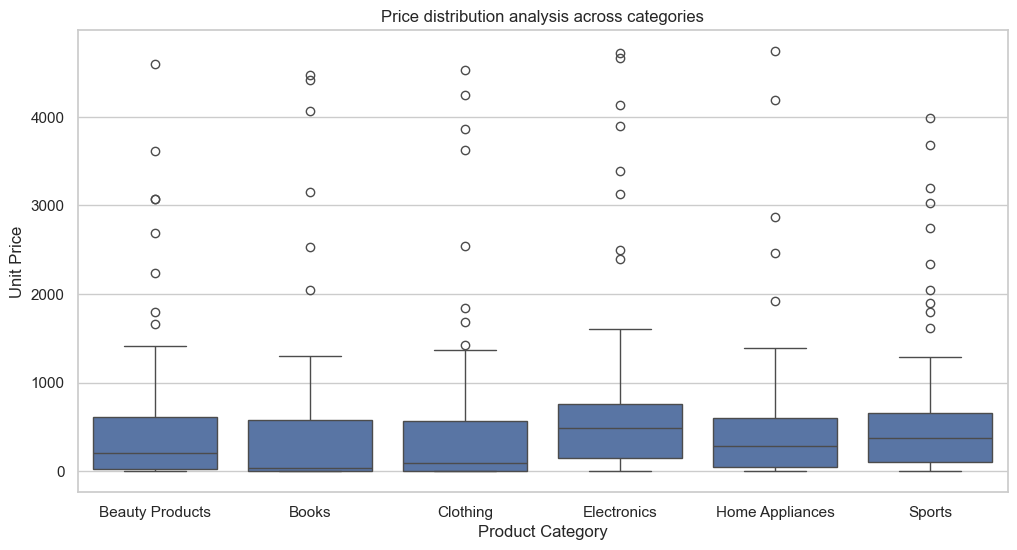

In [52]:

price_stats = df.groupby("Product Category")["Unit Price"].describe()
print(price_stats)

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x="Product Category", y="Unit Price", data=df)
plt.title("Price distribution analysis across categories")
plt.xlabel("Product Category")
plt.ylabel("Unit Price")
plt.xticks(rotation=0)
plt.show()


- Quantity purchase patterns

count    1155.000000
mean       20.315152
std        78.442018
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       499.000000
Name: Units Sold, dtype: float64


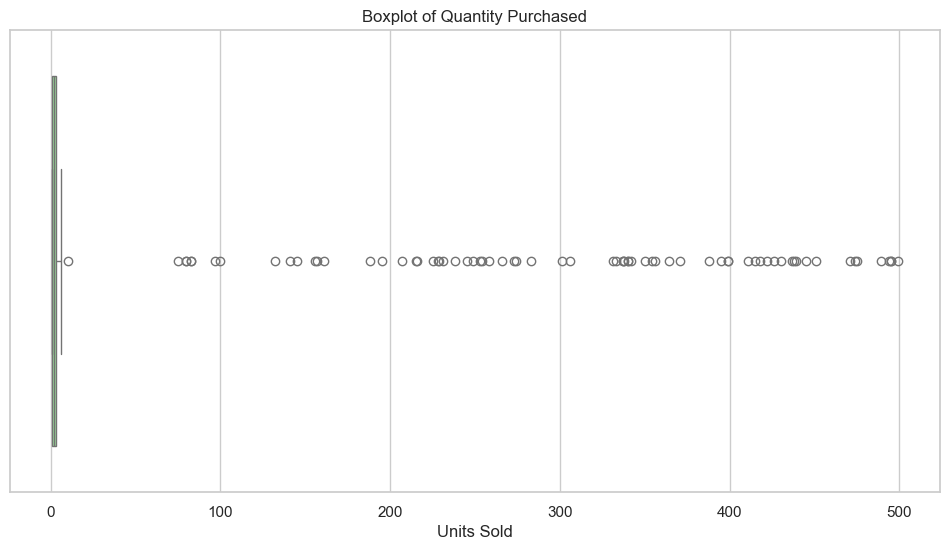

In [53]:
quantity_stats = df["Units Sold"].describe()
print(quantity_stats)

# Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Units Sold"], color="lightgreen")
plt.title("Boxplot of Quantity Purchased")
plt.xlabel("Units Sold")
plt.show()


-  Revenue concentration analysis

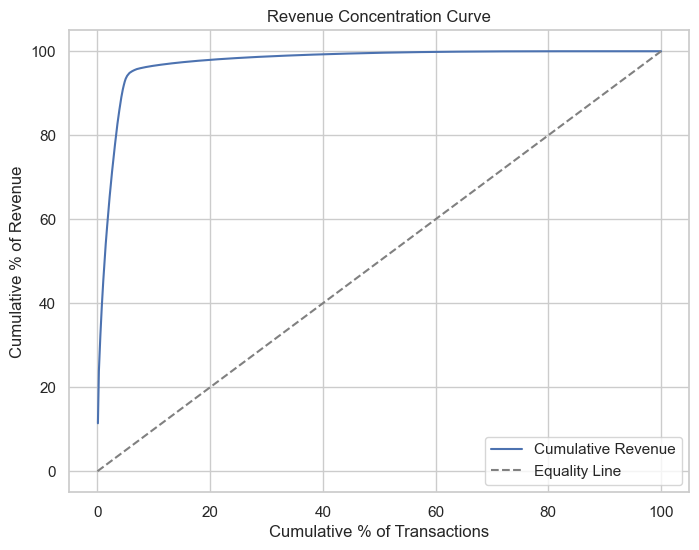

3.29% of transactions account for 80% of revenue


In [55]:
df_sorted = df.sort_values("Total Revenue", ascending=False).reset_index(drop=True)         # using sort function to order the revenue

df_sorted["Cumulative_Revenue"] = df_sorted["Total Revenue"].cumsum()                  # Calculate the revenue percentage for each transaction
total_revenue = df_sorted["Total Revenue"].sum()
df_sorted["Cumulative_Revenue_Percent"] = df_sorted["Cumulative_Revenue"] / total_revenue * 100

                                            
df_sorted["Transaction_Percent"] = (df_sorted.index + 1) / len(df_sorted) * 100        # Calculate the percentage of transactions

# 4) Visualization - Lorenz Curve
plt.figure(figsize=(8,6))
plt.plot(df_sorted["Transaction_Percent"], df_sorted["Cumulative_Revenue_Percent"], label="Cumulative Revenue")
plt.plot([0,100],[0,100], '--', color='gray', label="Equality Line")
plt.title("Revenue Concentration Curve")
plt.xlabel("Cumulative % of Transactions")
plt.ylabel("Cumulative % of Revenue")
plt.legend()
plt.show()

threshold = 80
num_transactions_80 = df_sorted[df_sorted["Cumulative_Revenue_Percent"] <= threshold].shape[0]
percent_transactions_80 = num_transactions_80 / len(df_sorted) * 100
print(f"{percent_transactions_80:.2f}% of transactions account for 80% of revenue")


# (6) Cross-Variable Relationships

- Price vs. Quantity correlation

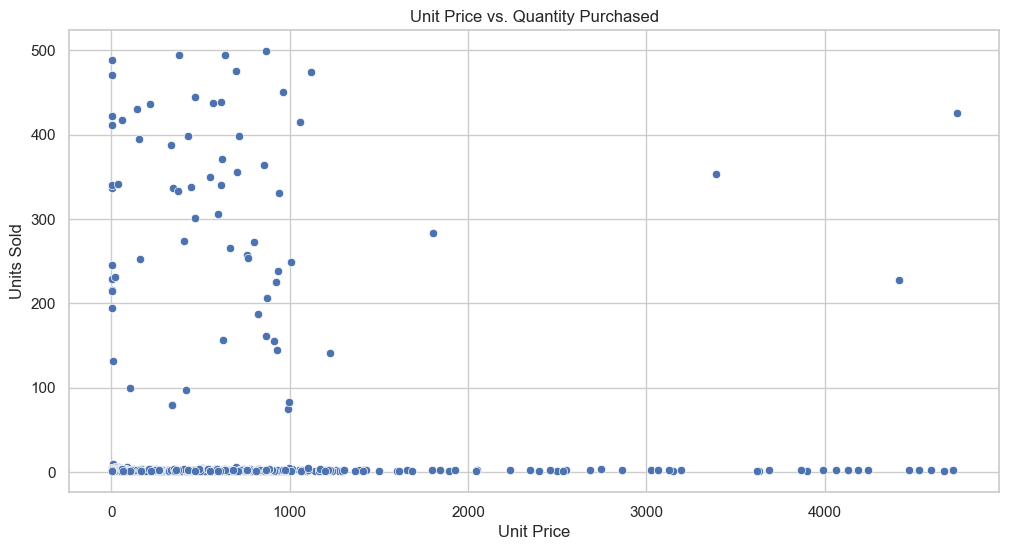

,Unit Price,Units Sold
count,1148.000000,1155.000000
mean,451.821873,20.315152
std,661.031174,78.442018
min,0.960000,1.000000
25%,22.660000,1.000000
50%,280.730000,2.000000
75%,639.607500,3.000000
max,4741.230000,499.000000


In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Unit Price", y="Units Sold", data=df)
plt.title("Unit Price vs. Quantity Purchased")
plt.xlabel("Unit Price")
plt.ylabel("Units Sold")
plt.show()
result = df[["Unit Price", "Units Sold"]].describe()
result

- Regional spending patterns

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2382763361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_region = df.groupby("Region")["Total Revenue"].mean()


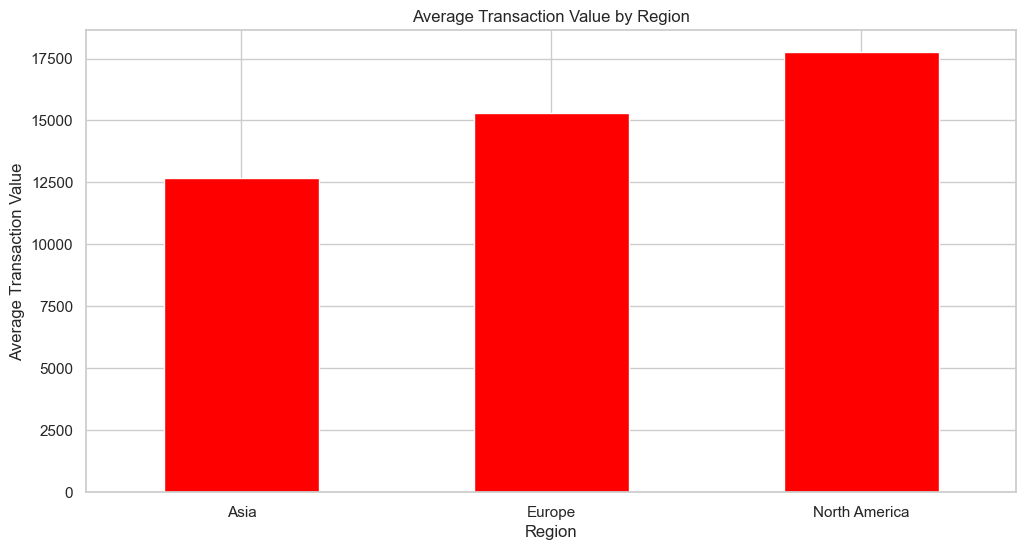

In [57]:
avg_by_region = df.groupby("Region")["Total Revenue"].mean()

# Bar Chart
plt.figure(figsize=(12,6))
avg_by_region.plot(kind="bar", color="red")
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=0)
plt.show()

- Category-Payment method relationships

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1773760398.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_payment_counts = df.groupby(["Product Category", "Payment Method"])["Payment Method"].count().unstack().fillna(0)


Payment Method    Bank Transfer  Credit Card  Cryptocurrency  Debit Card  \
Product Category                                                           
Beauty Products               1           83               3          27   
Books                         0          134               6          14   
Clothing                      2           89               4          60   
Electronics                   2          128               2          20   
Home Appliances               1           88               1          22   
Sports                        2          128               4          18   

Payment Method    Gift Card  Mobile Payment  PayPal  
Product Category                                     
Beauty Products           4               3      69  
Books                     3               3      32  
Clothing                  3               1      33  
Electronics               0               3      47  
Home Appliances           0               2      72  
Sports       

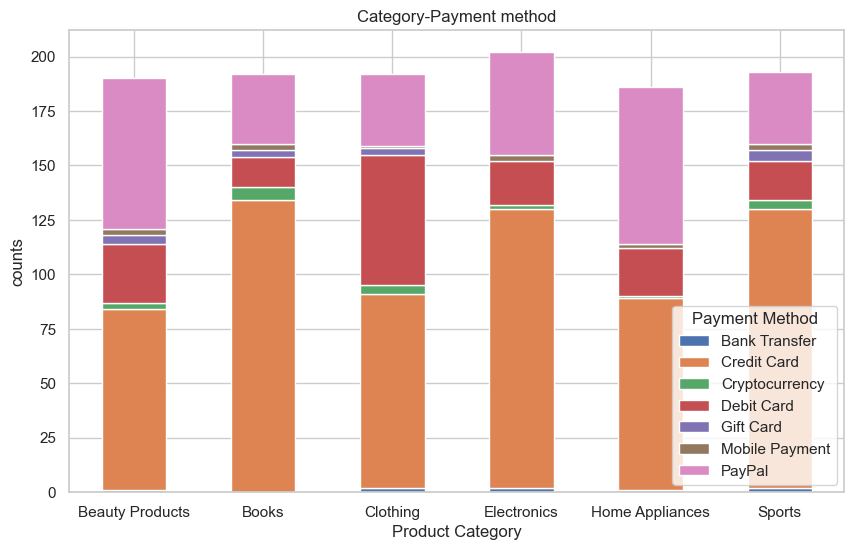

In [58]:
category_payment_counts = df.groupby(["Product Category", "Payment Method"])["Payment Method"].count().unstack().fillna(0)

print(category_payment_counts)

# Bar Chart
category_payment_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Category-Payment method")
plt.xlabel("Product Category")
plt.ylabel("counts")
plt.xticks(rotation=0)
plt.legend(title="Payment Method")
plt.show()


# (4) Feature Engineering & Data Transformation

### (4.1) Temporal Features
-  Extract day of week, month, quarter from Date column

In [59]:
df['Date'] = pd.to_datetime(df['Date'])

df['Weekday'] = df['Date'].dt.day_name()  
df['Month'] = df['Date'].dt.month              
df['Quarter'] = df['Date'].dt.quarter          
df['Is_Weekend'] = df['Weekday'].isin(['Saturday','Friday'])

df[['Date','Weekday','Month','Quarter','Is_Weekend']].head()

,Date,Weekday,Month,Quarter,Is_Weekend
0,2024-01-01,Monday,1.0,1.0,False
1,2024-01-02,Tuesday,1.0,1.0,False
2,2024-01-03,Wednesday,1.0,1.0,False
3,2024-01-04,Thursday,1.0,1.0,False
4,2024-01-05,Friday,1.0,1.0,True


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2146443350.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weekday', y='Total Revenue', data=df, estimator=sum, ci=None)


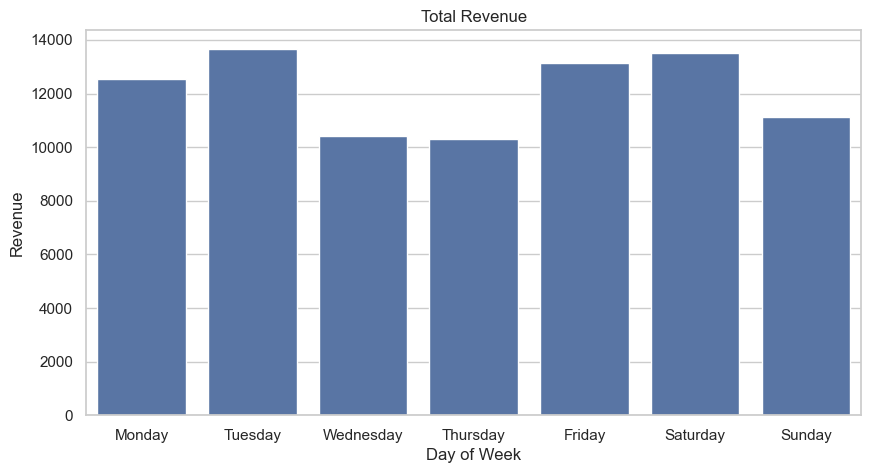

In [62]:
plt.figure(figsize=(10,5))
sns.barplot(x='Weekday', y='Total Revenue', data=df, estimator=sum, ci=None)
plt.title('Total Revenue')
plt.ylabel('Revenue')
plt.xlabel('Day of Week')
plt.show()


-  Create seasonal indicators (Spring, Summer, Fall, Winter)

In [64]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

df[['Month','Season']].head()


,Month,Season
0,1.0,Winter
1,1.0,Winter
2,1.0,Winter
3,1.0,Winter
4,1.0,Winter


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1484699439.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Total Revenue', data=df, estimator=sum, ci=None)


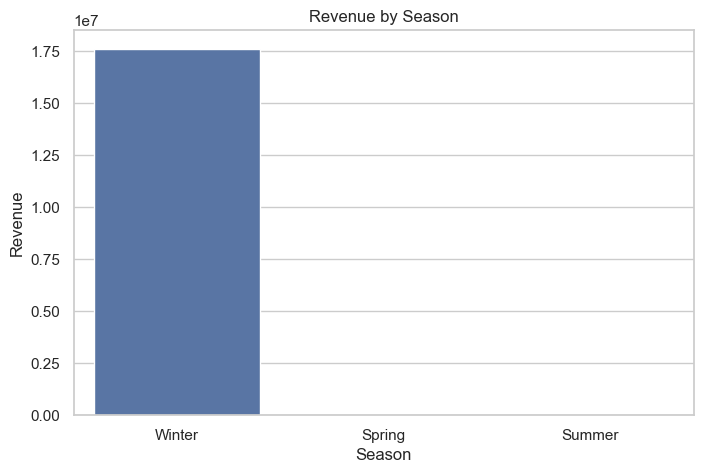

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='Total Revenue', data=df, estimator=sum, ci=None)
plt.title('Revenue by Season')
plt.ylabel('Revenue')
plt.xlabel('Season')
plt.show()


- Identify weekdays vs. weekends

In [69]:
df['Is_Weekend'] = df['Weekday'].isin(['Saturday','Friday'])

df['Weekend_Flag'] = df['Is_Weekend'].astype(int)            # return 1(true) if weekend , 0(false)if weekday

df[['Weekday','Is_Weekend','Weekend_Flag']].head()


,Weekday,Is_Weekend,Weekend_Flag
0,Monday,False,0
1,Tuesday,False,0
2,Wednesday,False,0
3,Thursday,False,0
4,Friday,True,1


- Calculate days since first transaction (customer lifecycle indicators)

In [71]:
df['Date'] = pd.to_datetime(df['Date'])

first_date = df['Date'].min()
df['Days_Since_First_Transaction'] = (df['Date'] - first_date).dt.days      # Return days from starting transaction

df[['Date','Days_Since_First_Transaction']].head(10)

,Date,Days_Since_First_Transaction
0,2024-01-01,0.0
1,2024-01-02,1.0
2,2024-01-03,2.0
3,2024-01-04,3.0
4,2024-01-05,4.0
5,2024-01-06,5.0
6,2024-01-07,6.0
7,2024-01-08,7.0
8,2024-01-09,8.0
9,2024-01-10,9.0


# (4.2) Business Metrics
- Price per unit categories (Low, Medium, High based on quartiles)

In [73]:
Q1 = df['Unit Price'].quantile(0.25)
Q3 = df['Unit Price'].quantile(0.75)

def category(price):
    if price <= Q1:
        return 'Low'
    elif price <= Q3:
        return 'Medium'
    else:
        return 'High'

df['Price Category'] = df['Unit Price'].apply(category)
df[['Unit Price','Price Category']].head()

,Unit Price,Price Category
0,999.99,High
1,499.99,Medium
2,69.99,Medium
3,15.99,Low
4,89.99,Medium


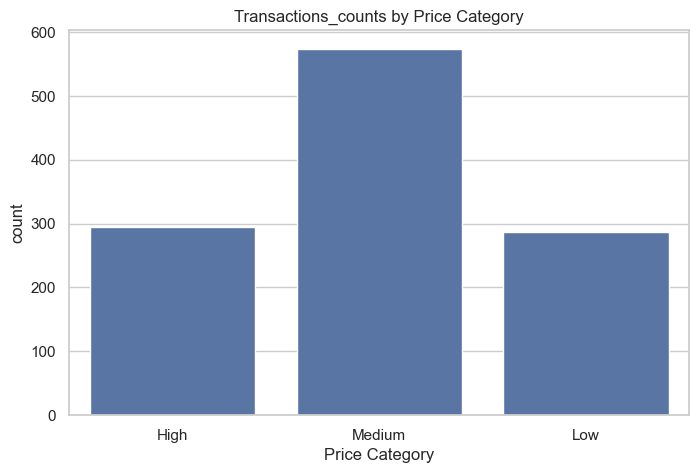

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(x='Price Category', data=df)
plt.title('Transactions_counts by Price Category')
plt.show()

- Order size categories (Single item, Small bulk, Large bulk)

In [77]:
def order_size_category(unit):
    if unit == 1:
        return 'Single item'
    elif 2 <= unit <= 5:
        return 'Small bulk'
    else:  
        return 'Large bulk'

df['Order_Size_Category'] = df['Units Sold'].apply(order_size_category)
df[['Units Sold','Order_Size_Category']].head()

,Units Sold,Order_Size_Category
0,2.0,Small bulk
1,1.0,Single item
2,3.0,Small bulk
3,2.0,Small bulk
4,1.0,Single item


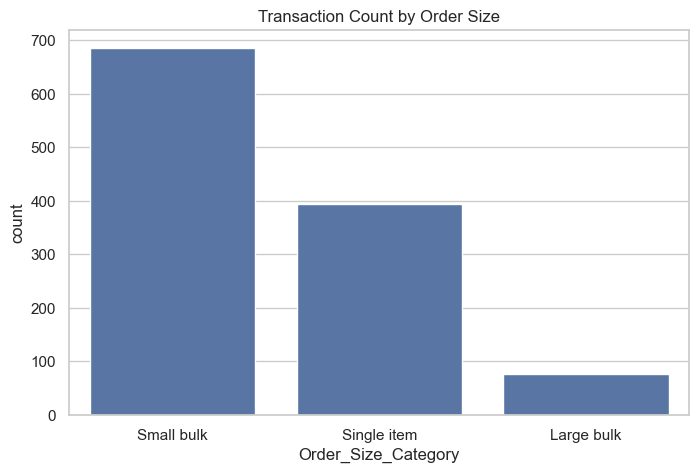

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(x='Order_Size_Category', data=df)
plt.title('Transaction Count by Order Size')
plt.show()


- Revenue tiers for transactions

In [81]:
df['Revenue_Tier'] = pd.qcut(df['Total Revenue'], q=3, labels=['Budget','Standard','Premium'])
                                    # Using qcut to divide the values into 3 approximately equal categories

df[['Total Revenue','Revenue_Tier']].head()


,Total Revenue,Revenue_Tier
0,1999.98,Premium
1,499.99,Standard
2,209.97,Standard
3,63.96,Budget
4,89.99,Budget


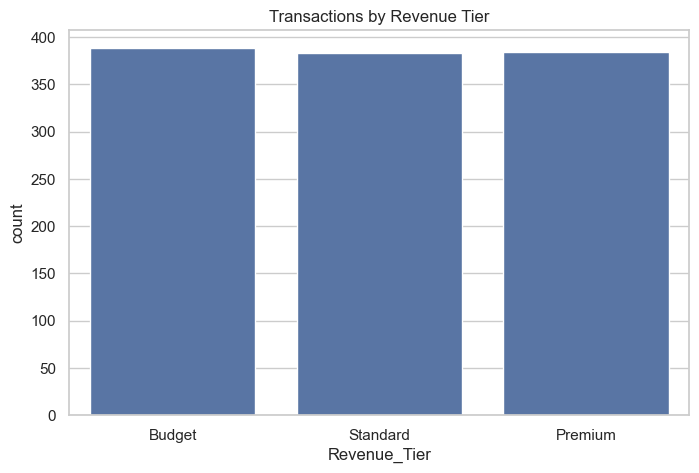

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='Revenue_Tier', data=df)
plt.title('Transactions by Revenue Tier')
plt.show()


- Product category groupings (if applicable)

In [85]:
category_mapping = {
    'Electronics': 'Technology Products',
    'Computers': 'Technology Products',
    'Mobile Phones': 'Technology Products',
    'Clothing': 'Fashion Items',
    'Beauty Products': 'Fashion Items',
    'Home Appliances': 'Home & Living',
   
}

df['Product Group'] = df['Product Category'].map(category_mapping)           #convert individual product categories into broader groups
df[['Product Category','Product Group']].head()


,Product Category,Product Group
0,Electronics,Technology Products
1,Home Appliances,Home & Living
2,Clothing,Fashion Items
3,Books,NaN
4,Beauty Products,Fashion Items


# (4.3) Geographic Features
-  Revenue concentration by region

In [87]:
region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index()
total_revenue = region_revenue['Total Revenue'].sum()

region_revenue['Revenue Percentage'] = (region_revenue['Total Revenue'] / total_revenue) * 100
region_revenue


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1142713805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index()


,Region,Total Revenue,Revenue Percentage
0,Asia,4696767.01,26.554569
1,Europe,5800662.69,32.795771
2,North America,7189797.77,40.649660


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3454638550.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index()


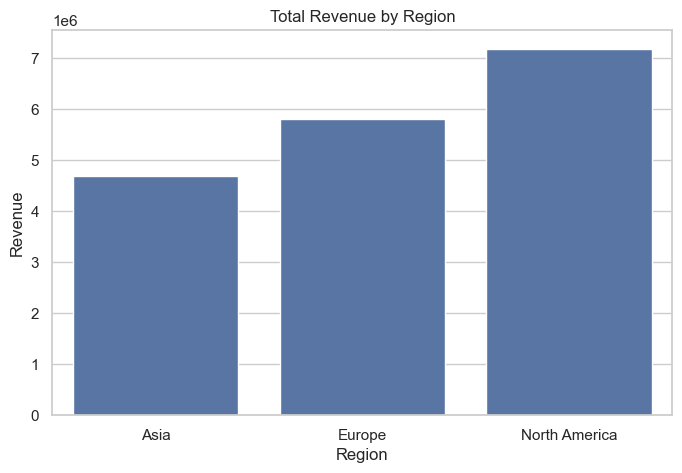

In [89]:
region_revenue = df.groupby('Region')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total Revenue', data=region_revenue)
plt.title('Total Revenue by Region')
plt.ylabel('Revenue')
plt.xlabel('Region')
plt.show()


- Regional market penetration metrics

In [91]:
regional_metrics = df.groupby('Region').agg(
    Total_Revenue=('Total Revenue','sum'),
    Avg_Revenue_Per_Transaction=('Total Revenue','mean'),
    Transaction_Volume=('Transaction ID','count')
).reset_index()

regional_metrics

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1566773281.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_metrics = df.groupby('Region').agg(


,Region,Total_Revenue,Avg_Revenue_Per_Transaction,Transaction_Volume
0,Asia,4696767.01,12659.749353,371
1,Europe,5800662.69,15305.178602,379
2,North America,7189797.77,17752.587086,405


# (4.4) Advanced Features
- Average selling price by product category

In [93]:
avg_price = df.groupby('Product Category').agg(
    Avg_Unit_Price=('Unit Price', 'mean')
).reset_index()

avg_price

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2252725529.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price = df.groupby('Product Category').agg(


,Product Category,Avg_Unit_Price
0,Beauty Products,414.277037
1,Books,369.747474
2,Clothing,377.176562
3,Electronics,615.040452
4,Home Appliances,431.096183
5,Sports,495.553594


- Category performance relative to overall marketplace

In [95]:
category_metrics = df.groupby('Product Category').agg(
    Total_Revenue=('Total Revenue','sum'),
    Transaction_Volume=('Transaction ID','count')
).reset_index()

avg_revenue = category_metrics['Total_Revenue'].mean()      #transforms the data from the individual transaction level to the product category level
avg_volume = category_metrics['Transaction_Volume'].mean()

category_metrics['Revenue_Performance'] = category_metrics['Total_Revenue'].apply(
    lambda x: 'Above Average' if x > avg_revenue else 'Below Average'
)
category_metrics['Volume_Performance'] = category_metrics['Transaction_Volume'].apply(
    lambda x: 'Above Average' if x > avg_volume else 'Below Average'
)
category_metrics


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2275977259.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_metrics = df.groupby('Product Category').agg(


,Product Category,Total_Revenue,Transaction_Volume,Revenue_Performance,Volume_Performance
0,Beauty Products,2413502.26,190,Below Average,Below Average
1,Books,3266908.37,192,Above Average,Below Average
2,Clothing,1236596.69,192,Below Average,Below Average
3,Electronics,4823296.86,202,Above Average,Above Average
4,Home Appliances,3365081.55,186,Above Average,Below Average
5,Sports,2581841.74,193,Below Average,Above Average


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2299865547.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_perf = df.groupby('Product Category')['Total Revenue'].sum().reset_index()


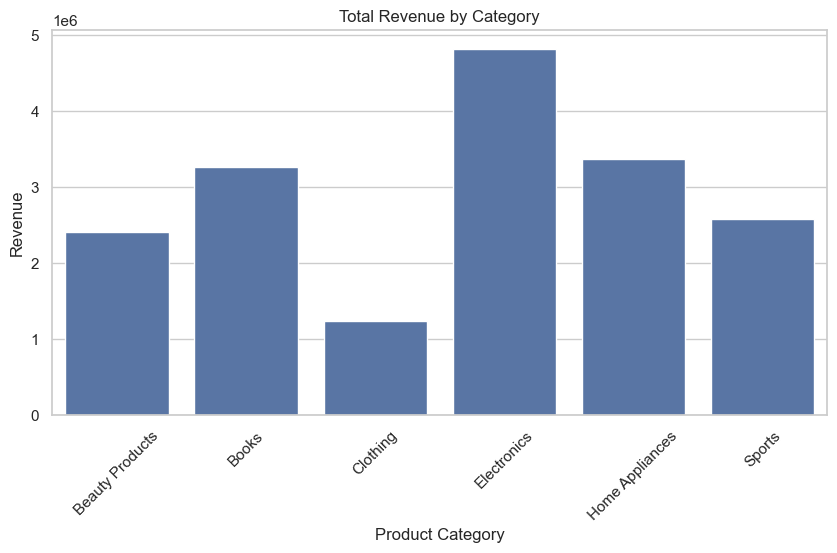

In [98]:
category_perf = df.groupby('Product Category')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='Product Category', y='Total Revenue', data=category_perf)
plt.title('Total Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()


- Payment method efficiency metrics

In [100]:
payment_metric = df.groupby('Payment Method').agg(
    Avg_Transaction_Size=('Total Revenue', 'mean'),
    Total_Revenue=('Total Revenue', 'sum'),
    Transaction_Count=('Transaction ID', 'count')
).reset_index()

print(payment_metric)

# Adoption rate by region
adoption_region = df.groupby(['Region','Payment Method']).agg(
    Transaction_Count=('Transaction ID','count')
).reset_index()

region_totals = adoption_region.groupby('Region')['Transaction_Count'].transform('sum')
adoption_region['Adoption_Percentage'] = (adoption_region['Transaction_Count'] / region_totals) * 100         # Calculate percentage 

adoption_region


   Payment Method  Avg_Transaction_Size  Total_Revenue  Transaction_Count
0   Bank Transfer           1540.611250       12324.89                  8
1     Credit Card          18075.999923    11749399.95                650
2  Cryptocurrency            673.499000       13469.98                 20
3      Debit Card           2940.060683      473349.77                161
4       Gift Card            580.973333        8714.60                 15
5  Mobile Payment            589.292667        8839.39                 15
6          PayPal          18954.996119     5421128.89                286


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3477775793.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_metric = df.groupby('Payment Method').agg(
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3477775793.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adoption_region = df.groupby(['Region','Payment Method']).agg(
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3477775793.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and

,Region,Payment Method,Transaction_Count,Adoption_Percentage
0,Asia,Bank Transfer,0,0.000000
1,Asia,Credit Card,203,54.716981
2,Asia,Cryptocurrency,4,1.078167
3,Asia,Debit Card,78,21.024259
4,Asia,Gift Card,8,2.156334
5,Asia,Mobile Payment,4,1.078167
6,Asia,PayPal,74,19.946092
7,Europe,Bank Transfer,1,0.263852
8,Europe,Credit Card,175,46.174142
9,Europe,Cryptocurrency,1,0.263852


- Transaction complexity scores

In [102]:
df['Transaction_Type'] = pd.qcut(df['Total Revenue'], q=3, labels=['Low', 'Medium', 'High'])

def order_complexity(qty):
    if qty == 1:
        return 'Single-item'
    elif 2 <= qty <= 5:
        return 'Small bulk'
    else:
        return 'Large bulk'

df['Order_Size'] = df['Units Sold'].apply(order_complexity)

# Unit_Price quartiles
Q1 = df['Unit Price'].quantile(0.25)
Q3 = df['Unit Price'].quantile(0.75)

# Premium vs Budget products using Unit_Price quartiles
def price_category(price):
    if price <= Q1:
        return 'Budget'
    elif price <= Q3:
        return 'Standard'
    else:
        return 'Premium'

df['Product_Price'] = df['Unit Price'].apply(price_category)

df[['Total Revenue','Units Sold','Unit Price','Order_Size','Transaction_Type','Product_Price']].head()

,Total Revenue,Units Sold,Unit Price,Order_Size,Transaction_Type,Product_Price
0,1999.98,2.0,999.99,Small bulk,High,Premium
1,499.99,1.0,499.99,Single-item,Medium,Standard
2,209.97,3.0,69.99,Small bulk,Medium,Standard
3,63.96,2.0,15.99,Small bulk,Low,Budget
4,89.99,1.0,89.99,Single-item,Low,Standard


# (4.5) Feature Transformation
- Categorical Data Conversion

In [104]:
categorical_columns = ['Product Category', 'Region', 'Payment Method']

for col in categorical_columns:
    df[col] = df[col].astype('category')            # Convert text columns to categorical type

df.dtypes


Transaction ID                          object
Date                            datetime64[ns]
Product Category                      category
Product Name                          category
Units Sold                             float64
Unit Price                             float64
Total Revenue                          float64
Region                                category
Payment Method                        category
Weekday                                 object
Month                                  float64
Season                                  object
Quarter                                float64
Is_Weekend                                bool
Weekend_Flag                             int64
Days_Since_First_Transaction           float64
Price Category                          object
Order_Size_Category                     object
Revenue_Tier                          category
Product Group                           object
Transaction_Type                      category
Order_Size   

- Drop product name column

In [106]:
df = df.drop(columns=['Product Name'])
df.head()

,Transaction ID,Date,Product Category,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Weekday,Month,...,Is_Weekend,Weekend_Flag,Days_Since_First_Transaction,Price Category,Order_Size_Category,Revenue_Tier,Product Group,Transaction_Type,Order_Size,Product_Price
0,10001,2024-01-01,Electronics,2.0,999.99,1999.98,North America,Credit Card,Monday,1.0,...,False,0,0.0,High,Small bulk,Premium,Technology Products,High,Small bulk,Premium
1,10002,2024-01-02,Home Appliances,1.0,499.99,499.99,Europe,PayPal,Tuesday,1.0,...,False,0,1.0,Medium,Single item,Standard,Home & Living,Medium,Single-item,Standard
2,10003,2024-01-03,Clothing,3.0,69.99,209.97,Asia,Debit Card,Wednesday,1.0,...,False,0,2.0,Medium,Small bulk,Standard,Fashion Items,Medium,Small bulk,Standard
3,10004,2024-01-04,Books,2.0,15.99,63.96,North America,Credit Card,Thursday,1.0,...,False,0,3.0,Low,Small bulk,Budget,NaN,Low,Small bulk,Budget
4,10005,2024-01-05,Beauty Products,1.0,89.99,89.99,Europe,PayPal,Friday,1.0,...,True,1,4.0,Medium,Single item,Budget,Fashion Items,Low,Single-item,Standard


- Numerical Encoding

In [109]:
# Encode categorical columns into numerical codes
categorical_columns = ['Product Category', 'Region', 'Payment Method']

for col in categorical_columns:
    df[col + '_Code'] = df[col].cat.codes

# Display first 5 rows to check
print(df[['Product Category','Product Category_Code','Region','Region_Code','Payment Method','Payment Method_Code']].head())


  Product Category  Product Category_Code         Region  Region_Code  \
0      Electronics                      3  North America            2   
1  Home Appliances                      4         Europe            1   
2         Clothing                      2           Asia            0   
3            Books                      1  North America            2   
4  Beauty Products                      0         Europe            1   

  Payment Method  Payment Method_Code  
0    Credit Card                    1  
1         PayPal                    6  
2     Debit Card                    3  
3    Credit Card                    1  
4         PayPal                    6  


- Data Type Optimization

In [111]:
df['Date'] = pd.to_datetime(df['Date'])

categorical_columns = ['Product Category', 'Region', 'Payment Method']
for col in categorical_columns:
    df[col] = df[col].astype('category')            # Convert text columns to categorical

numeric_columns = ['Units Sold', 'Unit Price', 'Total Revenue']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')       # Ensure numeric columns are correct type

df.dtypes


Transaction ID                          object
Date                            datetime64[ns]
Product Category                      category
Units Sold                             float64
Unit Price                             float64
Total Revenue                          float64
Region                                category
Payment Method                        category
Weekday                                 object
Month                                  float64
Season                                  object
Quarter                                float64
Is_Weekend                                bool
Weekend_Flag                             int64
Days_Since_First_Transaction           float64
Price Category                          object
Order_Size_Category                     object
Revenue_Tier                          category
Product Group                           object
Transaction_Type                      category
Order_Size                              object
Product_Price

# (5) Statistical Analysis & Hypothesis Testing 
###  (5.1) Regional Performance Comparison 
- Test if mean transaction values differ significantly across regions

In [ ]:

from scipy import stats

regions = df['Region'].unique()
region_values = [df[df['Region']==region]['Total Revenue'] for region in regions]

f_stat, p_value = stats.f_oneway(*region_values)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0")     # Mean transaction values differ significantly across regions
else:
    print("Fail to reject H0")      #No significant difference in mean transaction values.


F-statistic: 0.29807151415032473
p-value: 0.7423054840735531
Fail to reject H0


-  Investigate if product category preferences vary by region 


In [114]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Region'], df['Product Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0")               # Product category preferences vary by region.
else:
    print("Fail to reject H0")                   # No significant difference in product category preferences by region.


Chi2 statistic: 89.09535393533943
p-value: 8.093477983498054e-15
Reject H0


### (5.2)Payment Method Analysis
- Test if average order values differ by payment method

In [115]:
from scipy import stats

payment_methods = df['Payment Method'].unique()
payment_values = [df[df['Payment Method']==method]['Total Revenue'] for method in payment_methods]

f_stat, p_value = stats.f_oneway(*payment_values)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0")          # Average order values differ significantly by payment method.
else:
    print("Fail to reject H0")                 #No significant difference in average order values by payment method.


F-statistic: 0.9050536269170466
p-value: 0.49032966149927193
Fail to reject H0


- Analyze if payment method adoption is uniform across regions

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Region'], df['Payment Method'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0")          # Payment method adoption is not uniform across regions.
else:
    print("Fail to reject H0")              # Payment method adoption is uniform across regions.


Chi2 statistic: 114.67530867259129
p-value: 7.086899065909827e-19
Reject H0


### (5.3) Product Category Insights: 
- Test for significant differences in average prices across categories

In [119]:
from scipy import stats

categories = df['Product Category'].unique()
category_prices = [df[df['Product Category']==cat]['Unit Price'] for cat in categories]

f_stat, p_value = stats.f_oneway(*category_prices)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject H0 ")
else:
    print("Fail to reject H0")


F-statistic: nan
p-value: nan
Fail to reject H0


-  Investigate seasonal effects on category performance

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1659360895.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_revenue = df.groupby(['Season', 'Product Category'])['Total Revenue'].sum().reset_index()


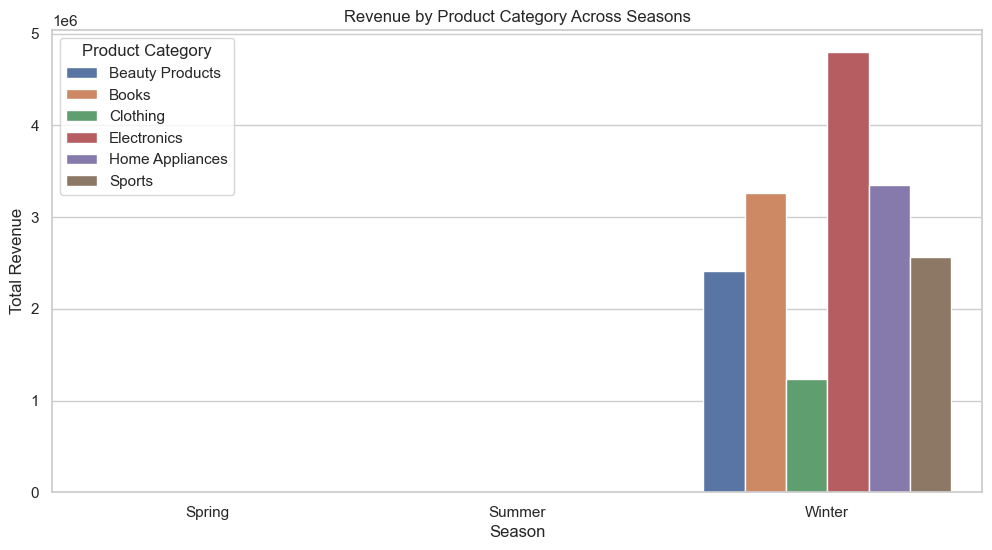

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

seasonal_revenue = df.groupby(['Season', 'Product Category'])['Total Revenue'].sum().reset_index()

# Visualization
plt.figure(figsize=(12,6))
sns.barplot(x='Season', y='Total Revenue', hue='Product Category', data=seasonal_revenue)
plt.title('Revenue by Product Category Across Seasons')
plt.ylabel('Total Revenue')
plt.xlabel('Season')
plt.show()


# (6) Advanced Analytics & Business Insights

### Customer Segmentation (Transaction-Based): 
- Segment transactions by order value, quantity, and frequency patterns

In [ ]:
# Segment by Order Value 
df['Order_Value_Segment'] = pd.qcut(df['Total Revenue'], q=3, labels=['Budget Shoppers', 'Standard Buyers', 'Premium Customers'])
df['Order_Value_Segment']

0       Premium Customers
1         Standard Buyers
2         Standard Buyers
3         Budget Shoppers
4         Budget Shoppers
              ...        
1150    Premium Customers
1151      Standard Buyers
1152      Standard Buyers
1153      Budget Shoppers
1154      Standard Buyers
Name: Order_Value_Segment, Length: 1155, dtype: category
Categories (3, object): ['Budget Shoppers' < 'Standard Buyers' < 'Premium Customers']

In [126]:
# Segment by Quantity
def quantity_segment(qty):
    if qty == 1:
        return 'Single Item Buyer'
    elif 2 <= qty <= 5:
        return 'Small Bulk Buyer'
    else:
        return 'Bulk Buyer'

df['Quantity_Segment'] = df['Units Sold'].apply(quantity_segment)
df['Quantity_Segment'] 

0        Small Bulk Buyer
1       Single Item Buyer
2        Small Bulk Buyer
3        Small Bulk Buyer
4       Single Item Buyer
              ...        
1150     Small Bulk Buyer
1151    Single Item Buyer
1152    Single Item Buyer
1153    Single Item Buyer
1154    Single Item Buyer
Name: Quantity_Segment, Length: 1155, dtype: object

In [130]:
# Order Value Segment distribution
order_value_dist = df['Order_Value_Segment'].value_counts(normalize=True) * 100
print("Order Value Segments (%):\n", order_value_dist)

# Quantity Segment distribution
quantity_dist = df['Quantity_Segment'].value_counts(normalize=True) * 100
print("\nQuantity Segments (%):\n", quantity_dist)


Order Value Segments (%):
 Order_Value_Segment
Budget Shoppers      33.593074
Premium Customers    33.246753
Standard Buyers      33.160173
Name: proportion, dtype: float64

Quantity Segments (%):
 Quantity_Segment
Small Bulk Buyer     59.307359
Single Item Buyer    34.112554
Bulk Buyer            6.580087
Name: proportion, dtype: float64


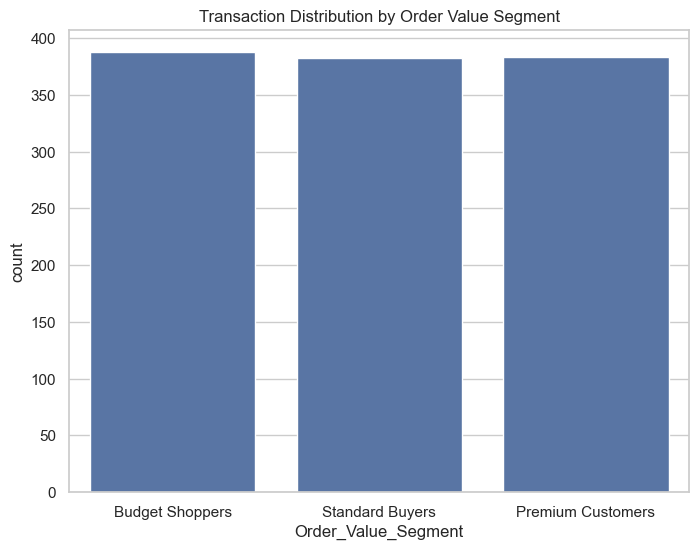

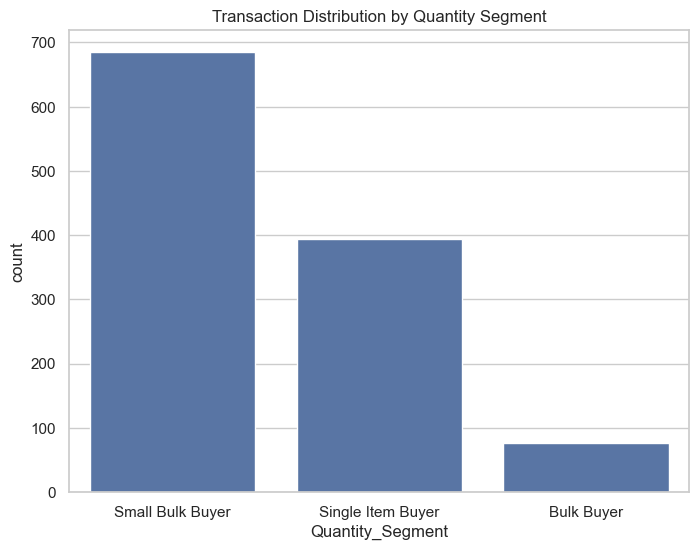

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='Order_Value_Segment', data=df)
plt.title('Transaction Distribution by Order Value Segment')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Quantity_Segment', data=df)
plt.title('Transaction Distribution by Quantity Segment')
plt.show()


- Analyze payment method preferences by segment

In [136]:
# Payment Method by Order Value Segment
payment_segment_table = pd.crosstab(df['Order_Value_Segment'], df['Payment Method'], normalize='index') * 100

print("Payment Method Distribution by Order Value Segment (%):")
print(payment_segment_table)


Payment Method Distribution by Order Value Segment (%):
Payment Method       Bank Transfer  Credit Card  Cryptocurrency  Debit Card  \
Order_Value_Segment                                                           
Budget Shoppers           0.515464    50.257732        2.319588   16.752577   
Standard Buyers           0.261097    54.569191        1.305483   15.143603   
Premium Customers         1.302083    64.062500        1.562500    9.895833   

Payment Method       Gift Card  Mobile Payment     PayPal  
Order_Value_Segment                                        
Budget Shoppers       1.546392        1.804124  26.804124  
Standard Buyers       1.566580        0.783290  26.370757  
Premium Customers     0.781250        1.302083  21.093750  


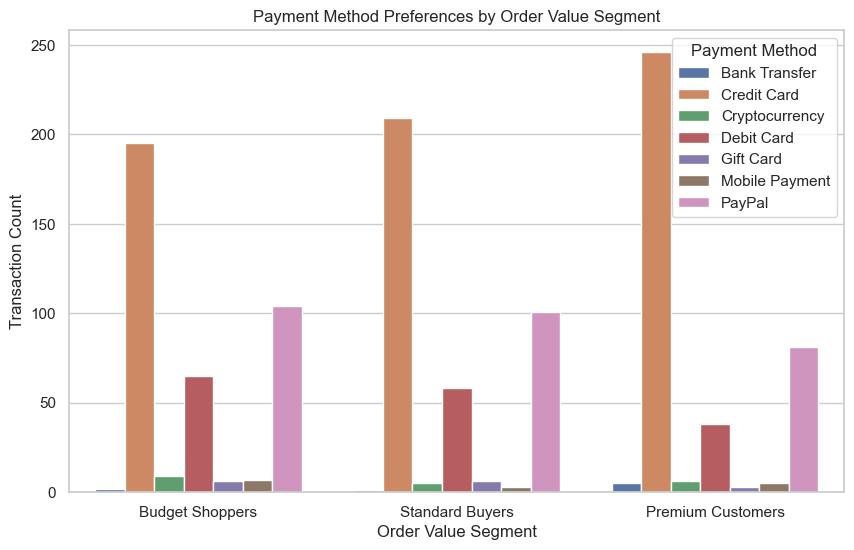

In [138]:
# Optional Visualization

plt.figure(figsize=(10,6))
sns.countplot(x='Order_Value_Segment', hue='Payment Method', data=df)
plt.title('Payment Method Preferences by Order Value Segment')
plt.ylabel('Transaction Count')
plt.xlabel('Order Value Segment')
plt.show()

In [140]:
# Payment Method by Segment and Region
payment_region_table = pd.crosstab([df['Region'], df['Order_Value_Segment']], df['Payment Method'], normalize='index') * 100

print("Payment Method Distribution by Segment and Region (%):")
print(payment_region_table)

Payment Method Distribution by Segment and Region (%):
Payment Method                     Bank Transfer  Credit Card  Cryptocurrency  \
Region        Order_Value_Segment                                               
Asia          Budget Shoppers           0.000000    43.750000        2.678571   
              Standard Buyers           0.000000    58.219178        0.000000   
              Premium Customers         0.000000    61.061947        0.884956   
Europe        Budget Shoppers           0.000000    35.000000        0.714286   
              Standard Buyers           0.000000    42.276423        0.000000   
              Premium Customers         0.862069    63.793103        0.000000   
North America Budget Shoppers           1.470588    71.323529        3.676471   
              Standard Buyers           0.877193    63.157895        4.385965   
              Premium Customers         2.580645    66.451613        3.225806   

Payment Method                     Debit Card  Gift C

In [147]:
# Statistical Test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Order_Value_Segment'], df['Payment Method'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")


Chi2 statistic: 24.316070110718712
p-value: 0.018417852200223735
Reject H0


- Identify high-value transaction characteristics

Percentage of high-value transactions: 25.02164502164502 %


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2013413768.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_value_category = df[df['High_Value_Flag']].groupby('Product Category')['Total Revenue'].count().sort_values(ascending=False)
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2013413768.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_value_region = df[df['High_Value_Flag']].groupby('Region')['Total Revenue'].count().sort_values(ascending=False)
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\2013413768.py:15: FutureWarning: The default of observed=False is deprecated and will be changed t

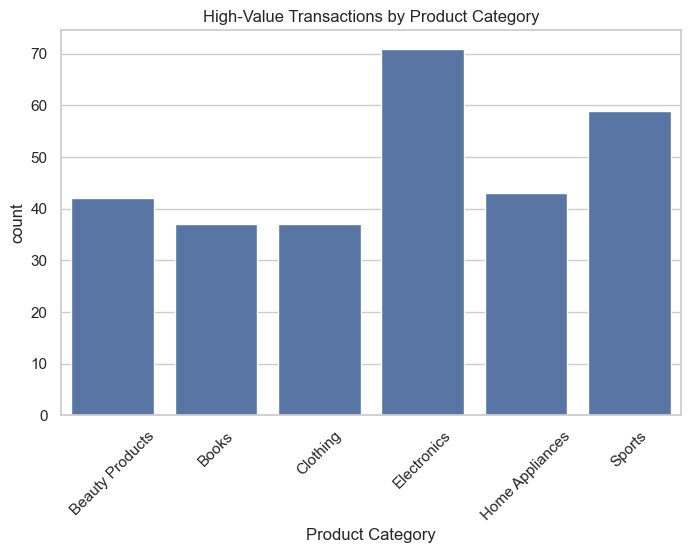

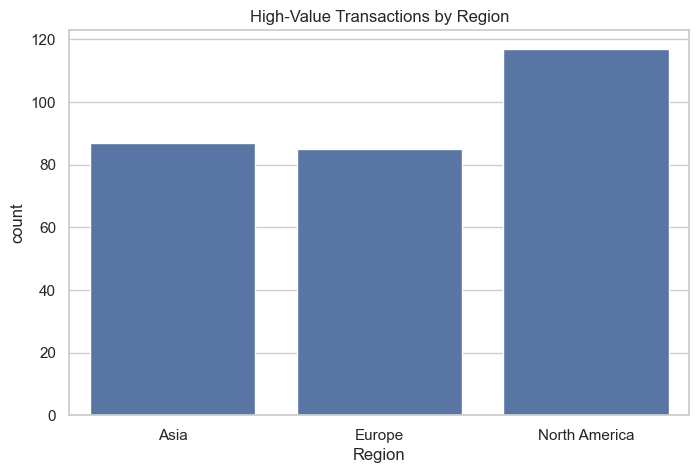

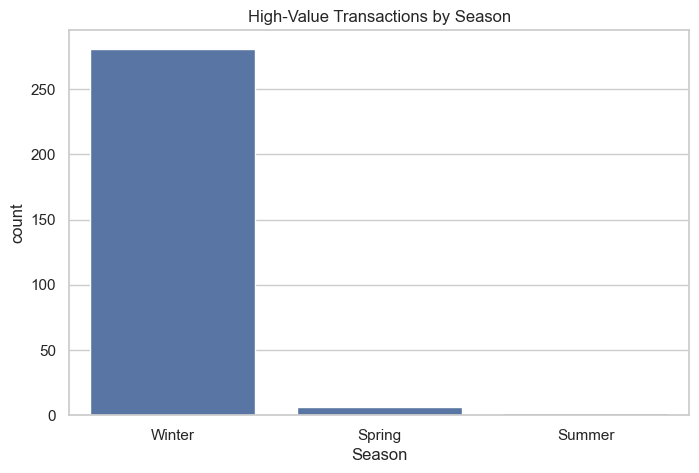

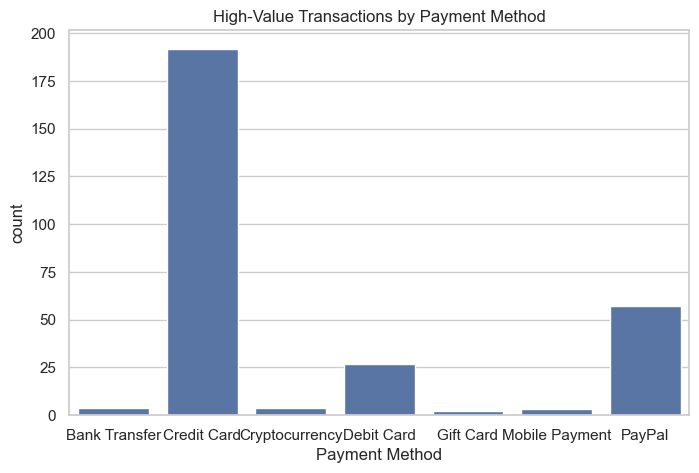

In [150]:
high_value_threshold = df['Total Revenue'].quantile(0.75)
df['High_Value_Flag'] = df['Total Revenue'] >= high_value_threshold

print("Percentage of high-value transactions:", df['High_Value_Flag'].mean()*100, "%")

high_value_category = df[df['High_Value_Flag']].groupby('Product Category')['Total Revenue'].count().sort_values(ascending=False)
high_value_category

high_value_region = df[df['High_Value_Flag']].groupby('Region')['Total Revenue'].count().sort_values(ascending=False)
high_value_region

high_value_season = df[df['High_Value_Flag']].groupby('Season')['Total Revenue'].count().sort_values(ascending=False)
high_value_season

high_value_payment = df[df['High_Value_Flag']].groupby('Payment Method')['Total Revenue'].count().sort_values(ascending=False)
high_value_payment

# Product Category
plt.figure(figsize=(8,5))
sns.countplot(x='Product Category', data=df[df['High_Value_Flag']])
plt.title('High-Value Transactions by Product Category')
plt.xticks(rotation=45)
plt.show()

# Region
plt.figure(figsize=(8,5))
sns.countplot(x='Region', data=df[df['High_Value_Flag']])
plt.title('High-Value Transactions by Region')
plt.show()

# Season
plt.figure(figsize=(8,5))
sns.countplot(x='Season', data=df[df['High_Value_Flag']])
plt.title('High-Value Transactions by Season')
plt.show()

# Payment Method
plt.figure(figsize=(8,5))
sns.countplot(x='Payment Method', data=df[df['High_Value_Flag']])
plt.title('High-Value Transactions by Payment Method')
plt.show()


- Create customer personas based on purchasing behavior

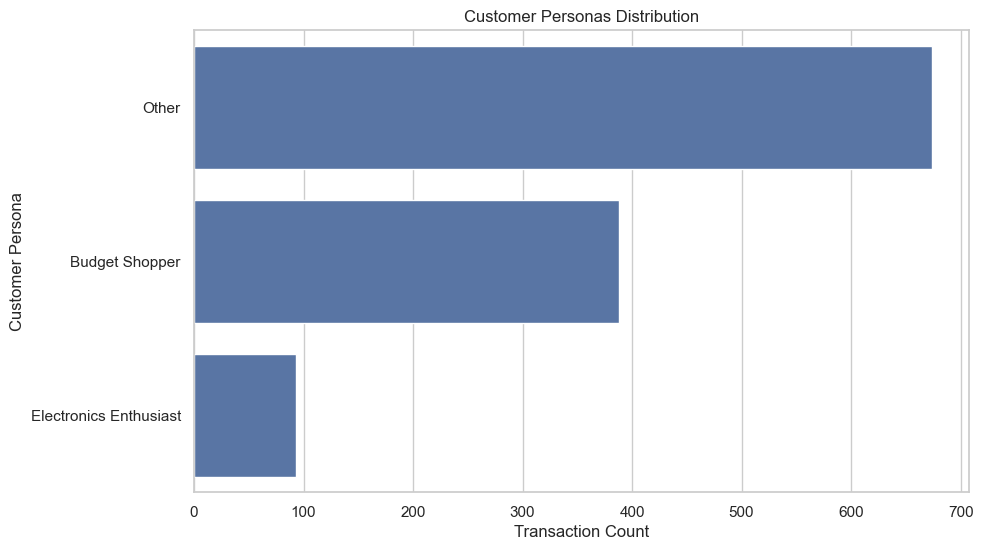

In [156]:
df['Customer_Persona'] = 'Other'

df.loc[(df['Product Category'] == 'Electronics') & 
       (df['Order_Value_Segment'] == 'Premium Customers'), 'Customer_Persona'] = 'Electronics Enthusiast'

# Regional Bulk Buyer
df.loc[(df['Order_Size_Category'] == 'Large Bulk') & 
       (df['Region'].isin(['Region_A', 'Region_B'])), 'Customer_Persona'] = 'Regional Bulk Buyer'

# Budget Shopper
df.loc[(df['Order_Value_Segment'] == 'Budget Shoppers'), 'Customer_Persona'] = 'Budget Shopper'

plt.figure(figsize=(10,6))
sns.countplot(y='Customer_Persona', data=df, order=df['Customer_Persona'].value_counts().index)
plt.title('Customer Personas Distribution')
plt.xlabel('Transaction Count')
plt.ylabel('Customer Persona')
plt.show()




### (6.3) Comparative Performance Analysis
- Benchmark category performance against marketplace averages

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3122411648.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_perf = df.groupby('Product Category').agg(


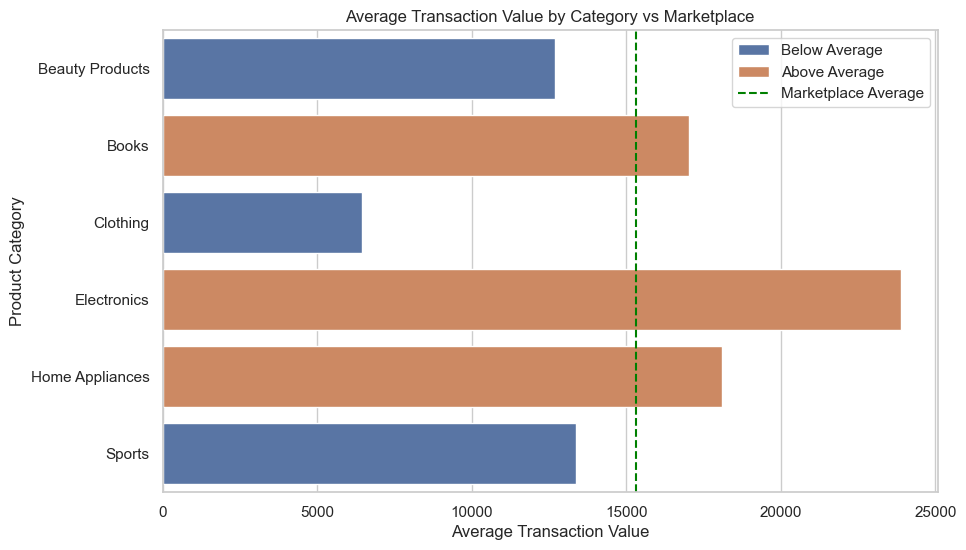

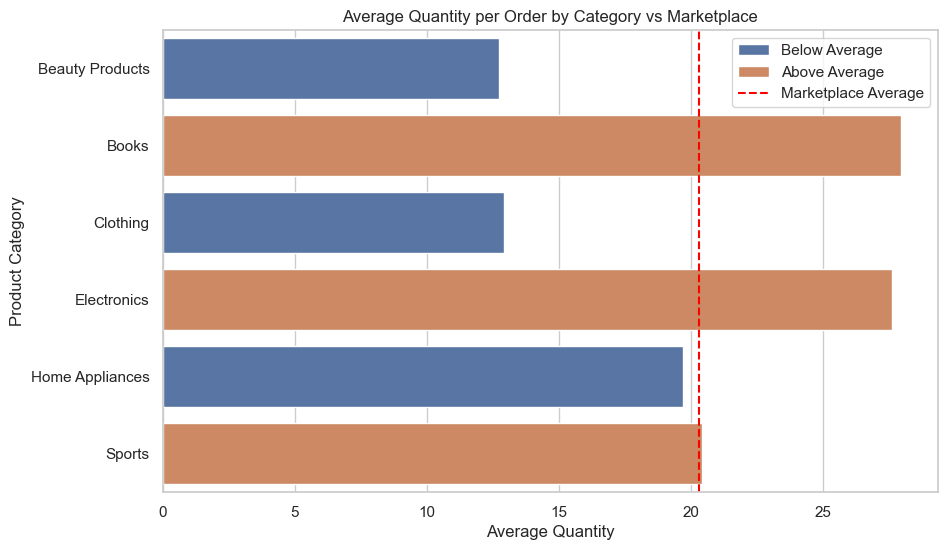

In [161]:
avg_value = df['Total Revenue'].mean()
avg_quantity = df['Units Sold'].mean()

category_perf = df.groupby('Product Category').agg(
    avg_transaction_value=('Total Revenue','mean'),
    avg_quantity=('Units Sold','mean'),
    transaction_count=('Transaction ID','count')
).reset_index()

# Compare against marketplace benchmarks
category_perf['Value_vs_Marketplace'] = np.where(category_perf['avg_transaction_value'] > avg_value, 'Above Average', 'Below Average')
category_perf['Quantity_vs_Marketplace'] = np.where(category_perf['avg_quantity'] > avg_quantity, 'Above Average', 'Below Average')

# Average Transaction Value by Category
plt.figure(figsize=(10,6))
sns.barplot(x='avg_transaction_value', y='Product Category', data=category_perf, hue='Value_vs_Marketplace', dodge=False)
plt.axvline(avg_value, color='green', linestyle='--', label='Marketplace Average')
plt.title('Average Transaction Value by Category vs Marketplace')
plt.xlabel('Average Transaction Value')
plt.ylabel('Product Category')
plt.legend()
plt.show()

# Average Quantity per Order by Category
plt.figure(figsize=(10,6))
sns.barplot(x='avg_quantity', y='Product Category', data=category_perf, hue='Quantity_vs_Marketplace', dodge=False)
plt.axvline(avg_quantity, color='red', linestyle='--', label='Marketplace Average')
plt.title('Average Quantity per Order by Category vs Marketplace')
plt.xlabel('Average Quantity')
plt.ylabel('Product Category')
plt.legend()
plt.show()


- Identify top and bottom performing products within categories 

In [169]:
# Aggregate metrics per Product within Category
product_perf = df.groupby(['Product Category']).agg(
    total_revenue=('Total Revenue','sum'),
    total_quantity=('Units Sold','sum'),
    transaction_count=('Transaction ID','count')
).reset_index()

# Rank products within each category
product_perf['Revenue_Rank'] = product_perf.groupby('Product Category')['total_revenue'].rank(ascending=False, method='first')
product_perf['Quantity_Rank'] = product_perf.groupby('Product Category')['total_quantity'].rank(ascending=False, method='first')
product_perf['Transaction_Rank'] = product_perf.groupby('Product Category')['transaction_count'].rank(ascending=False, method='first')

# Identify Top and Bottom Performers (top 10% and bottom 10%)
def performance_flag(rank, total_count):
    if rank <= 0.1*total_count:
        return 'Top Performer'
    elif rank > 0.9*total_count:
        return 'Bottom Performer'
    else:
        return 'Average'

product_perf['Revenue_Performance'] = product_perf.groupby('Product Category')['Revenue_Rank'].transform(lambda x: x.apply(lambda r: performance_flag(r, len(x))))
product_perf['Quantity_Performance'] = product_perf.groupby('Product Category')['Quantity_Rank'].transform(lambda x: x.apply(lambda r: performance_flag(r, len(x))))
product_perf['Transaction_Performance'] = product_perf.groupby('Product Category')['Transaction_Rank'].transform(lambda x: x.apply(lambda r: performance_flag(r, len(x))))

# Display results
print(product_perf.sort_values(['Product Category','Revenue_Rank']).head(20))



  Product Category  total_revenue  total_quantity  transaction_count  \
0  Beauty Products     2413502.26          2422.0                190   
1            Books     3266908.37          5369.0                192   
2         Clothing     1236596.69          2485.0                192   
3      Electronics     4823296.86          5583.0                202   
4  Home Appliances     3365081.55          3663.0                186   
5           Sports     2581841.74          3942.0                193   

   Revenue_Rank  Quantity_Rank  Transaction_Rank Revenue_Performance  \
0           1.0            1.0               1.0    Bottom Performer   
1           1.0            1.0               1.0    Bottom Performer   
2           1.0            1.0               1.0    Bottom Performer   
3           1.0            1.0               1.0    Bottom Performer   
4           1.0            1.0               1.0    Bottom Performer   
5           1.0            1.0               1.0    Bottom Perf

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3635087041.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_perf = df.groupby(['Product Category']).agg(
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3635087041.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_perf['Revenue_Rank'] = product_perf.groupby('Product Category')['total_revenue'].rank(ascending=False, method='first')
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3635087041.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3505394175.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_perf = df.groupby(['Region','Product Category']).agg(


   Region Product Category  total_revenue  total_quantity  transaction_count
0    Asia  Beauty Products      846137.38           692.0                 56
1    Asia            Books     1067891.26          1480.0                 38
2    Asia         Clothing      401262.12           887.0                 76
3    Asia      Electronics     1833268.66          2406.0                 59
4    Asia  Home Appliances      216781.82           112.0                 55
5    Asia           Sports      331425.77           273.0                 87
6  Europe  Beauty Products     1508469.01          1614.0                 79
7  Europe            Books      224133.69          1308.0                 57
8  Europe         Clothing      347106.54           800.0                 54
9  Europe      Electronics     1121125.29          1932.0                 49


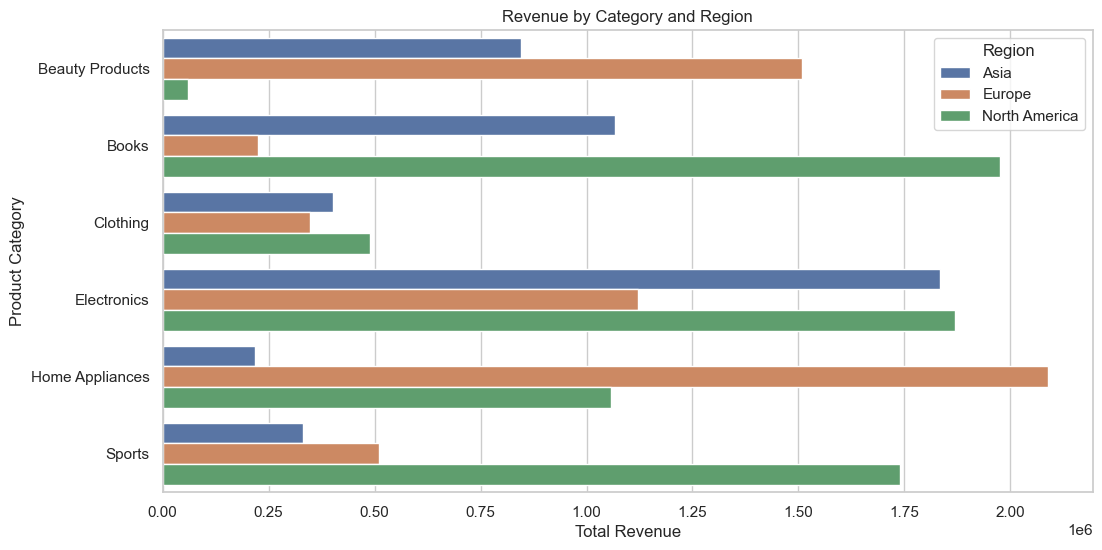

In [ ]:
region_perf = df.groupby(['Region','Product Category']).agg(
    total_revenue=('Total Revenue','sum'),
    total_quantity=('Units Sold','sum'),
    transaction_count=('Transaction ID','count')
).reset_index()
print(region_perf.head(10))

# Calculate  (percentage)

region_perf['Revenue_Share_%'] = region_perf.groupby('Product Category')['total_revenue'].apply(lambda x: x/x.sum()*100)
region_perf['Quantity_Share_%'] = region_perf.groupby('Product Category')['total_quantity'].apply(lambda x: x/x.sum()*100)

region_perf['Revenue_Rank'] = region_perf.groupby('Product Category')['total_revenue'].rank(ascending=False, method='first')
region_perf['Quantity_Rank'] = region_perf.groupby('Product Category')['total_quantity'].rank(ascending=False, method='first')

top_regions = region_perf[region_perf['Revenue_Rank']==1]

# Visualizatoin

plt.figure(figsize=(12,6))
sns.barplot(x='total_revenue', y='Product Category', hue='Region', data=region_perf)
plt.title('Revenue by Category and Region')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()


- Compare payment method efficiency and adoption rates

In [ ]:
payment_efficiency = df.groupby('Payment Method').agg(
    avg_transaction_value=('Total Revenue','mean'),
    transaction_count=('Transaction ID','count')
)

payment_efficiency['adoption_rate_%'] = payment_efficiency['transaction_count'] / payment_efficiency['transaction_count'].sum() * 100

print("Payment Method Efficiency & Adoption:\n", payment_efficiency)

payment_region = df.groupby(['Region','Payment Method']).agg(
    avg_transaction_value=('Total Revenue','mean'),
    transaction_count=('Transaction ID','count')
)


payment_region['regional_adoption_%'] = payment_region.groupby('Region')['transaction_count'].apply(lambda x: x / x.sum() * 100)

print("\nPayment Method by Region:\n", payment_region)

Payment Method Efficiency & Adoption:
                 avg_transaction_value  transaction_count  adoption_rate_%
Payment Method                                                           
Bank Transfer             1540.611250                  8         0.692641
Credit Card              18075.999923                650        56.277056
Cryptocurrency             673.499000                 20         1.731602
Debit Card                2940.060683                161        13.939394
Gift Card                  580.973333                 15         1.298701
Mobile Payment             589.292667                 15         1.298701
PayPal                   18954.996119                286        24.761905


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1264923878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_efficiency = df.groupby('Payment Method').agg(
C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\1264923878.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_region = df.groupby(['Region','Payment Method']).agg(


### (6.4) Cross-Dimensional Analysis: 
- Investigate relationships between multiple variables simultaneously

In [194]:
#  Example 1: Europe, Credit Card, Electronics, Winter 
subset = df[
    (df['Region'] == 'Europe') &
    (df['Payment Method'] == 'Credit Card') &
    (df['Product Category'] == 'Electronics') &
    (df['Season'] == 'Winter')
]

# Metrics
total_revenue = subset['Total Revenue'].sum()
avg_transaction_value = subset['Total Revenue'].mean()
transaction_count = subset.shape[0]

print("Europe | Credit Card | Electronics | Winter:")
print(f"Total Revenue: {total_revenue}")
print(f"Average Transaction Value: {avg_transaction_value}")
print(f"Number of Transactions: {transaction_count}")

#Example 2: Bulk Electronics in Asia by Season 
subset_bulk = df[
    (df['Region'] == 'Asia') &
    (df['Product Category'] == 'Electronics') &
    (df['Order_Size_Category'] == 'Large Bulk')
]

bulk_by_season = subset_bulk.groupby('Season').agg(
    total_revenue=('Total Revenue','sum'),
    transaction_count=('Transaction ID','count')
).reset_index()

print("\nBulk Electronics Purchases in Asia by Season:\n", bulk_by_season)


Europe | Credit Card | Electronics | Winter:
Total Revenue: 641075.65
Average Transaction Value: 21369.188333333335
Number of Transactions: 30

Bulk Electronics Purchases in Asia by Season:
 Empty DataFrame
Columns: [Season, total_revenue, transaction_count]
Index: []


- Analyze interaction effects between region, category, and payment methods: 


In [210]:
# Aggregate metrics by Region, Category, and Payment Method
interaction_perf = df.groupby(['Region','Product Category','Payment Method']).agg(
    total_revenue=('Total Revenue','sum'),
    avg_transaction_value=('Total Revenue','mean'),
    transaction_count=('Transaction ID','count')
).reset_index()

# Rank combinations by total revenue
interaction_perf['Revenue_Rank'] = interaction_perf['total_revenue'].rank(ascending=False, method='first')

# Display top 10 performing combinations
top_combinations = interaction_perf.sort_values('Revenue_Rank').head(10)
print("Top 10 Region-Category-Payment Method Combinations:\n", top_combinations)

# Example: Check a specific combination
example_combo = interaction_perf[
    (interaction_perf['Region'] == 'North America') &
    (interaction_perf['Product Category'] == 'Home & Garden') &
    (interaction_perf['Payment Method'] == 'Credit Card')
]
example_combo


Top 10 Region-Category-Payment Method Combinations:
             Region Product Category Payment Method  total_revenue  \
76          Europe  Home Appliances         PayPal     2046481.49   
92   North America            Books    Credit Card     1623007.48   
120  North America           Sports    Credit Card     1460994.00   
106  North America      Electronics    Credit Card     1262132.04   
43          Europe  Beauty Products    Credit Card     1244733.35   
8             Asia            Books    Credit Card     1050506.13   
22            Asia      Electronics    Credit Card      987706.68   
27            Asia      Electronics         PayPal      831217.26   
113  North America  Home Appliances    Credit Card      761880.71   
1             Asia  Beauty Products    Credit Card      704523.80   

     avg_transaction_value  transaction_count  Revenue_Rank  
76            39355.413269                 52           1.0  
92            21355.361579                 76           2.0  
1

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\243165393.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interaction_perf = df.groupby(['Region','Product Category','Payment Method']).agg(


,Region,Product Category,Payment Method,total_revenue,avg_transaction_value,transaction_count,Revenue_Rank


- Identify unexpected patterns and business opportunities

C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3126143023.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  books_season_region = df[df['Product Category'] == 'Books'].groupby(['Region','Season']).agg(


Digital Wallet users in South America - Premium Electronics:
Total Revenue: 0.0
Average Transaction Value: nan
Number of Transactions: 0

Books Category Revenue by Season and Region:
           Region  Season  total_revenue  transaction_count
0           Asia  Spring           0.00                  0
1           Asia  Summer           0.00                  0
2           Asia  Winter     1067891.26                 38
3         Europe  Spring           0.00                  0
4         Europe  Summer           0.00                  0
5         Europe  Winter      224133.69                 57
6  North America  Spring         667.51                 16
7  North America  Summer         539.58                 16
8  North America  Winter     1973676.33                 65


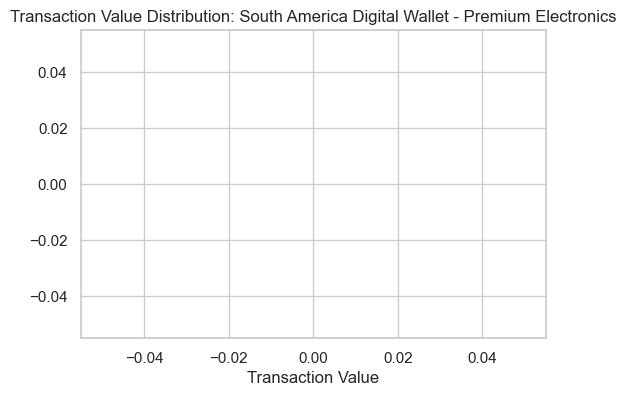

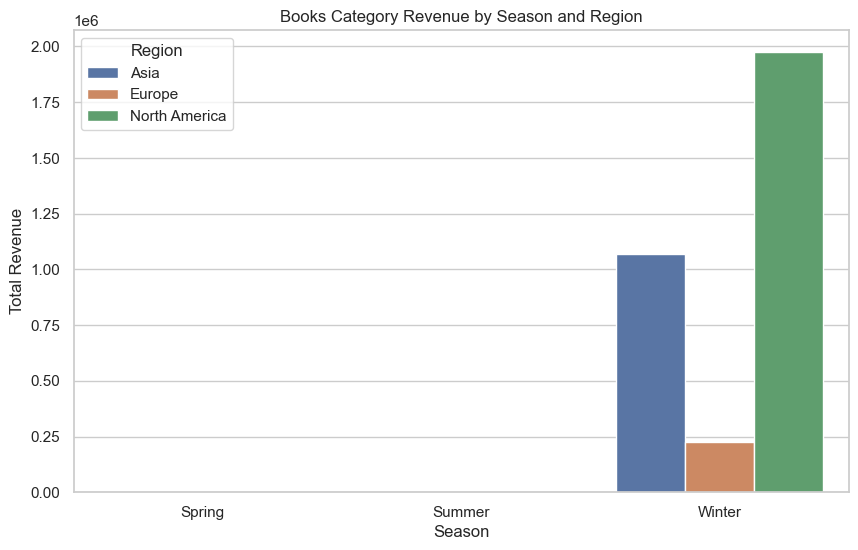

In [211]:
# Example 1: Digital Wallet users in South America buying high-value Electronics
subset_digital_wallet = df[
    (df['Region'] == 'South America') &
    (df['Payment Method'] == 'Digital Wallet') &
    (df['Product Category'] == 'Electronics') &
    (df['Order_Value_Segment'] == 'Premium Customers')
]

dw_total_revenue = subset_digital_wallet['Total Revenue'].sum()
dw_avg_transaction = subset_digital_wallet['Total Revenue'].mean()
dw_transaction_count = subset_digital_wallet.shape[0]

print("Digital Wallet users in South America - Premium Electronics:")
print(f"Total Revenue: {dw_total_revenue}")
print(f"Average Transaction Value: {dw_avg_transaction}")
print(f"Number of Transactions: {dw_transaction_count}")

# Example 2: Books category seasonal peaks by region
books_season_region = df[df['Product Category'] == 'Books'].groupby(['Region','Season']).agg(
    total_revenue=('Total Revenue','sum'),
    transaction_count=('Transaction ID','count')
).reset_index()

print("\nBooks Category Revenue by Season and Region:\n", books_season_region)
import seaborn as sns
import matplotlib.pyplot as plt

# Digital Wallet Premium Electronics in South America
plt.figure(figsize=(6,4))
sns.histplot(subset_digital_wallet['Total Revenue'], bins=20, kde=True)
plt.title('Transaction Value Distribution: South America Digital Wallet - Premium Electronics')
plt.xlabel('Transaction Value')
plt.show()

# Books Category seasonal revenue by region
plt.figure(figsize=(10,6))
sns.barplot(x='Season', y='total_revenue', hue='Region', data=books_season_region)
plt.title('Books Category Revenue by Season and Region')
plt.ylabel('Total Revenue')
plt.show()



- Create multi-factor performance matrices

In [212]:
# Aggregate metrics by Region, Category, Payment Method
multi_factor_matrix = df.groupby(['Region','Product Category','Payment Method']).agg(
    total_revenue=('Total Revenue','sum'),
    avg_transaction_value=('Total Revenue','mean'),
    transaction_count=('Transaction ID','count')
).reset_index()

#  Calculate contribution to overall revenue
total_revenue_all = multi_factor_matrix['total_revenue'].sum()
multi_factor_matrix['revenue_contribution_%'] = multi_factor_matrix['total_revenue'] / total_revenue_all * 100

multi_factor_matrix.head(20)


C:\Users\A.S\AppData\Local\Temp\ipykernel_14516\3080773772.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  multi_factor_matrix = df.groupby(['Region','Product Category','Payment Method']).agg(


,Region,Product Category,Payment Method,total_revenue,avg_transaction_value,transaction_count,revenue_contribution_%
0,Asia,Beauty Products,Bank Transfer,0.00,NaN,0,0.000000
1,Asia,Beauty Products,Credit Card,704523.80,23484.126667,30,3.983235
2,Asia,Beauty Products,Cryptocurrency,0.00,NaN,0,0.000000
3,Asia,Beauty Products,Debit Card,16462.61,1646.261000,10,0.093076
4,Asia,Beauty Products,Gift Card,2982.44,994.146667,3,0.016862
5,Asia,Beauty Products,Mobile Payment,0.00,NaN,0,0.000000
6,Asia,Beauty Products,PayPal,122168.53,9397.579231,13,0.690716
7,Asia,Books,Bank Transfer,0.00,NaN,0,0.000000
8,Asia,Books,Credit Card,1050506.13,52525.306500,20,5.939349
9,Asia,Books,Cryptocurrency,8.48,8.480000,1,0.000048


In [213]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Units Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Payment Method', 'Weekday',
       'Month', 'Season', 'Quarter', 'Is_Weekend', 'Weekend_Flag',
       'Days_Since_First_Transaction', 'Price Category', 'Order_Size_Category',
       'Revenue_Tier', 'Product Group', 'Transaction_Type', 'Order_Size',
       'Product_Price', 'Product Category_Code', 'Region_Code',
       'Payment Method_Code', 'Order_Value_Segment', 'Quantity_Segment',
       'High_Value_Flag', 'Customer_Persona'],
      dtype='object')